# PGA Tour Exploratory Data Analysis & Machine Learning Project

***
Welcome to my data science project that seeks to uncover meaningful statistical differences that separate the success of golfers. Through a combination of data analysis and statistical techniques, I will be exploring a large dataset of 2010-2018 PGA Tour golfers to discover patterns and trends in their performance. Additionally, I will be leveraging both classification and regression machine learning models to analyze the data and gain insight into the factors that contribute to success on the golf course.<br><br>
My goal is to then use this information to better understand what it takes to become a successful golfer. With this understanding, I hope to provide valuable insights that can help golfers optimize their performance.
***

### Objectives:
1. **Analyze the dataset to visualize patterns, trends, and relationships in the data that equate to the success of golfers on the PGA Tour**<br><br> 
2. **Perform machine learning classification models to predict if a golfer is a 'TopPlayer' (based on wins, top 10 finishes, and points in a year)**
    - **Assess the performance of each model and rank feature importance**<br><br>
3. **Execute machine learning regression models to predict the 'Money' of a golfer (accumulated earnings in a year)** 
    - **Evaluate the performance of each model and identify which aspect of the game has the most influence on a player's success on tour (tee shots, mid range, short range, or putting)**

## <a id='TOC'>Table of Contents</a>
<ol>
<li><a href='#section 1'>Description of the Data</a></li>
<li><a href='#section_2'>Data Cleaning and Formatting</a></li>
<li><a href='#section_3'>Exploratory Data Analysis</a></li>
<li><a href='#section_4'>Supervised Machine Learning - Classification</a></li>
<li><a href='#section_5'>Supervised Machine Learning - Regression</a></li>
<li><a href='#section_6'>Conclusion</a></li>
</ol>

## 1. <a id='section_1'>Description of the Data</a>
<a href='#TOC'>Back to table of Contents</a><br><br>
Data was imported from Kaggle (https://www.kaggle.com/code/jmpark746/pga-tour-machine-learning-project/data)
#### Column Descriptions:
1. `Player Name:` Name of golfer<br>
2. `Rounds:` Number of rounds a player golfed<br>
3. `Fairway Percentage:` Percentage of tee shots landed in the fairway<br>
4. `Year:` Year the data record was collected<br>
5. `Avg Distance:` Average distance of tee-shot<br>
6. `gir:` (Green in Regulation) Percentage that the ball is on the green in par minus 2 strokes<br>
7. `Average Putts:` Average number of strokes taken on the green<br>
8. `Average Scrambling:` Player misses the green in regulation, but still makes par or better on a hole<br>
9. `Average Score:` Average of all scores the player has shot in the year<br>
10. `Points:` Number of FedExCup points a player earned in the year.<br>
11. `Wins:` Number of tournaments a player has won in the year<br>
12. `Top 10:` Number of tournaments a player has placed in the Top 10<br>
13. `Average SG Putts:` (Strokes gained: putting) Number of strokes a player gains or loses on the greens compared to the field<br>
14. `Average SG Total:` Averaged strokes gained of (Off-the-tee) + (approach-the-green) + (around-the-green) + (putting)<br>
15. `SG:OTT:` (Strokes gained: off-the-tee) Number of strokes a player gains or loses off of par-4/par-5 tees compared to the field<br>
16. `SG:APR:` (Strokes gained: approach-the-green) Number of strokes a player gains or loses on approach shots compared to the field.<br> 
(Approach shots: All shots that are not from the tee on par-4/5 holes and are not included in SG:ARG or SG:putting. Includes tee shots on par-3s)<br>
17. `SG:ARG:` (Strokes gained: around-the-green) Number of strokes a player gains or loses on any shot within 30 yards of the edge of the green<br>
18. `Money:` Total amount of prize money a player has earned from tournaments in a year<br>

#### Importing dataset and packages

In [213]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
import seaborn as sns
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")
from pandas import DataFrame

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [214]:
# Import dataset
df = pd.read_csv('C:\\Users\\dbgode\\pgaTourData.csv')
df.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


## 2. <a id='section_2'>Data Cleaning and Formatting</a>
<a href='#TOC'>Back to table of Contents</a>

In [215]:
# Renaming columns for consistency
df.rename(columns = {'Player Name':'Name', 'Fairway Percentage':'Fairway_Pct', 'Avg Distance':'Avg_Dist', 
                     'gir':'GIR', 'Average Putts':'Avg_Putts', 'Average Scrambling':'Avg_Scrambling', 
                     'Average Score':'Avg_Score', 'Top 10':'Top_10', 'Average SG Putts':'SG_Putts', 
                     'Average SG Total':'SG_Total', 'SG:OTT':'SG_OTT','SG:APR':'SG_APR', 'SG:ARG':'SG_ARG'}, inplace=True)

In [216]:
# Replacing null values to 0s and converting dtype to int for 'Wins' and 'Top_10'
df['Wins'].fillna(0, inplace=True)
df['Wins'] = df['Wins'].astype(int)

df['Top_10'].fillna(0, inplace=True)
df['Top_10'] = df['Top_10'].astype(int)

# Dropping null values
df.dropna(axis = 0, inplace=True)

In [217]:
# Number of remaining rows/columns to work with
df.shape

(1674, 18)

In [218]:
# Converting 'Rounds', 'Points', 'Wins', and 'Top_10' to int and removing commas from Points
df['Rounds'] = df['Rounds'].astype(int)
df['Points'] = df['Points'].apply(lambda x: x.replace(',','')) # eliminate commas
df['Points'] = df['Points'].astype(int)

# Converting 'Money' from object to float and removing the $ and comma symbols
df['Money'] = df['Money'].apply(lambda x: x.replace('$',''))
df['Money'] = df['Money'].apply(lambda x: x.replace(',',''))
df['Money'] = df['Money'].astype(float)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 0 to 1677
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1674 non-null   object 
 1   Rounds          1674 non-null   int32  
 2   Fairway_Pct     1674 non-null   float64
 3   Year            1674 non-null   int64  
 4   Avg_Dist        1674 non-null   float64
 5   GIR             1674 non-null   float64
 6   Avg_Putts       1674 non-null   float64
 7   Avg_Scrambling  1674 non-null   float64
 8   Avg_Score       1674 non-null   float64
 9   Points          1674 non-null   int32  
 10  Wins            1674 non-null   int32  
 11  Top_10          1674 non-null   int32  
 12  SG_Putts        1674 non-null   float64
 13  SG_Total        1674 non-null   float64
 14  SG_OTT          1674 non-null   float64
 15  SG_APR          1674 non-null   float64
 16  SG_ARG          1674 non-null   float64
 17  Money           1674 non-null   f

In [220]:
df.describe()

,Rounds,Fairway_Pct,Year,Avg_Dist,GIR,Avg_Putts,Avg_Scrambling,Avg_Score,Points,Wins,Top_10,SG_Putts,SG_Total,SG_OTT,SG_APR,SG_ARG,Money
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1.674000e+03
mean,78.769415,61.448614,2014.002987,290.786081,65.667103,29.163542,58.120687,70.922877,631.125448,0.206691,2.337515,0.025408,0.147527,0.037019,0.065192,0.020192,1.488682e+06
std,14.241512,5.057758,2.609352,8.908379,2.743211,0.518966,3.386783,0.698738,452.741472,0.516601,2.060691,0.344145,0.695400,0.379702,0.380895,0.223493,1.410333e+06
min,45.000000,43.020000,2010.000000,266.400000,53.540000,27.510000,44.010000,68.698000,3.000000,0.000000,0.000000,-1.475000,-3.209000,-1.717000,-1.680000,-0.930000,2.465000e+04
25%,69.000000,57.955000,2012.000000,284.900000,63.832500,28.802500,55.902500,70.494250,322.000000,0.000000,1.000000,-0.187750,-0.260250,-0.190250,-0.180000,-0.123000,5.656412e+05
50%,80.000000,61.435000,2014.000000,290.500000,65.790000,29.140000,58.290000,70.904500,530.000000,0.000000,2.000000,0.040000,0.147000,0.055000,0.081000,0.022500,1.046144e+06
75%,89.000000,64.910000,2016.000000,296.375000,67.587500,29.520000,60.420000,71.343750,813.750000,0.000000,3.000000,0.258500,0.568500,0.287750,0.314500,0.175750,1.892478e+06
max,120.000000,76.880000,2018.000000,319.700000,73.520000,31.000000,69.330000,74.400000,4169.000000,5.000000,14.000000,1.130000,2.406000,1.485000,1.533000,0.660000,1.203046e+07


Data is cleaned

## 3. <a id='section_3'>Exploratory Data Analysis</a>
<a href='#TOC'>Back to table of Contents</a>

#### Distribution of non-scoring related variables

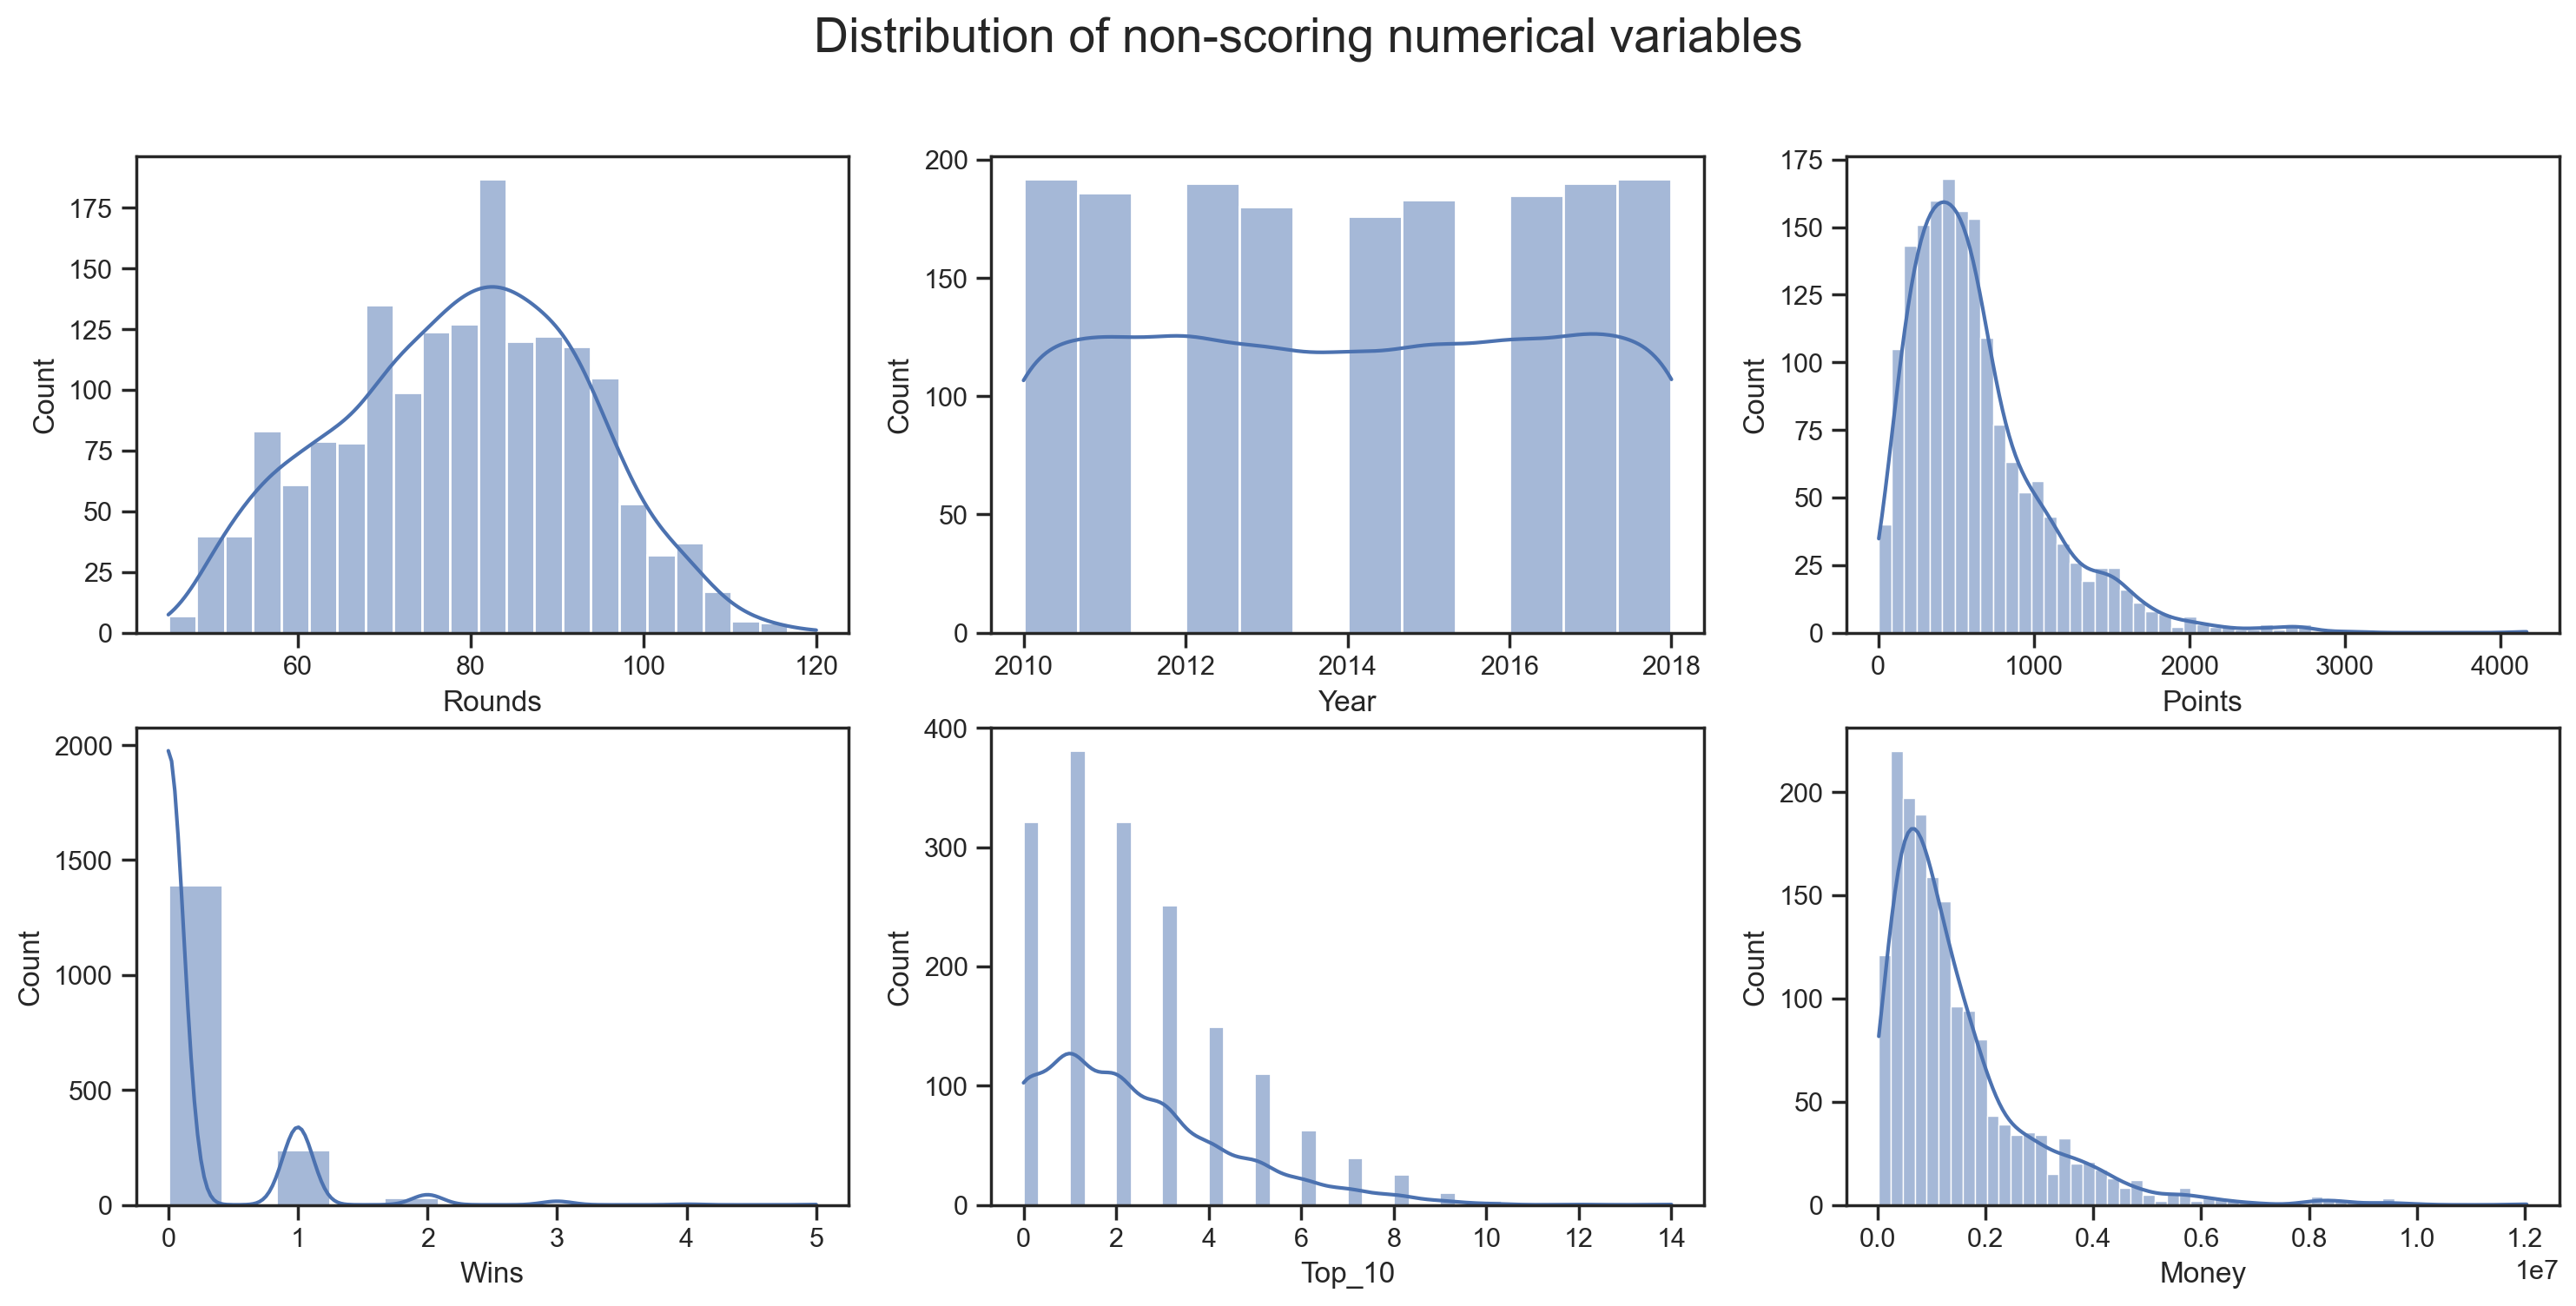

In [221]:
fig, ax = plt.subplots(2, 3, figsize = (18, 8))
plt.suptitle('Distribution of non-scoring numerical variables', fontsize = 20)

ax1 = sns.histplot(x = 'Rounds', data=df, kde=True, ax=ax[0, 0]) # Distribution of 'Rounds'
ax1.set(xlabel = 'Rounds')
ax2 = sns.histplot(x = 'Year', data=df, kde=True, ax=ax[0, 1]) # Distribution of 'Year'
ax2.set(xlabel = 'Year')
ax3 = sns.histplot(x = 'Points', data=df, kde=True, ax=ax[0, 2]) # Distribution of 'Points'
ax3.set(xlabel = 'Points')
ax4 = sns.histplot(x = 'Wins', data=df, kde=True, ax=ax[1, 0]) # Distribution of 'Wins'
ax4.set(xlabel = 'Wins')
ax5 = sns.histplot(x = 'Top_10', data=df, kde=True, ax=ax[1, 1]) # Distribution of 'Top_10'
ax5.set(xlabel = 'Top_10')
ax6 = sns.histplot(x = 'Money', data=df, kde=True, ax=ax[1, 2]) # Distribution of 'Money'
ax6.set(xlabel = 'Money')
plt.show()

Observations:
* Rounds and Years evenly distributed
* Points, Wins, Top_10, and Money expected to be right-skewed, as the top players on tour dominate all categories 

#### Correlation Heatmap

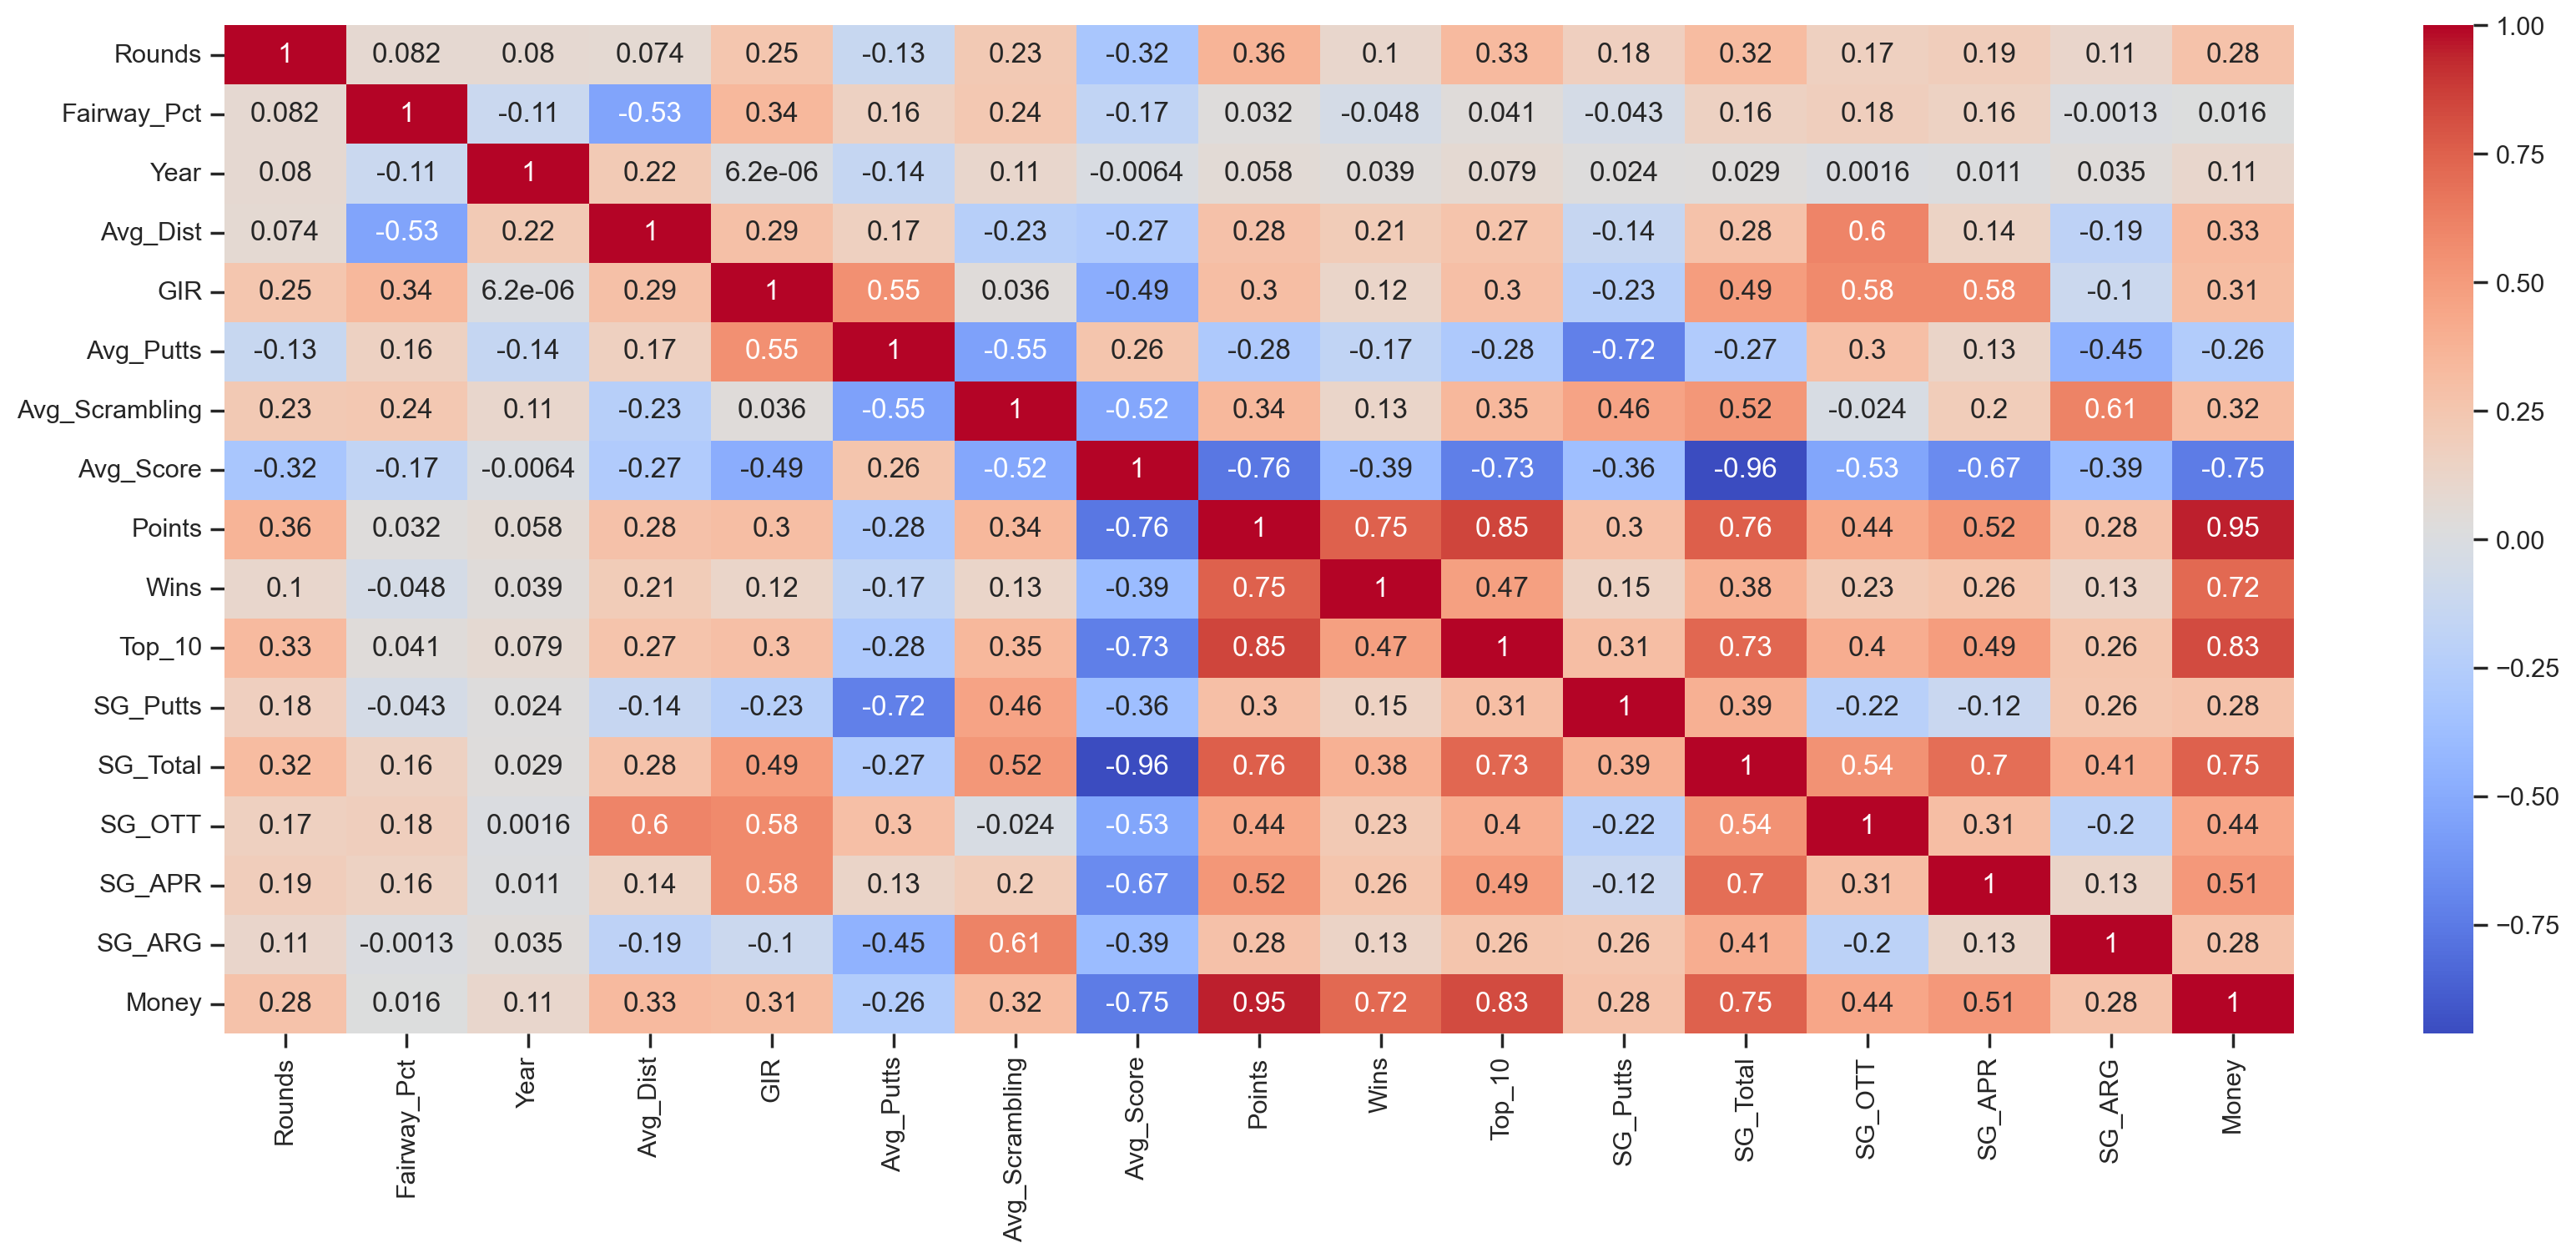

In [222]:
# Plotting the heatmap
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), cmap= 'coolwarm', annot = True)
plt.show()

Observations:<br>
* SG_Total and Avg_Score have high negative correlation, which makes sense because lower average score = better
* Points, Money, SG_Total, Top_10, and Wins are all highly positively correlated which is sensible
* Avg_Dist and Fairway_Pct are negatively correlated, indicating that power off the tee may sacrifice accuracy
* Avg_Dist correlates higher with SG_OTT than Fairway_Pct, potentially suggesting that power is more effective at gaining strokes off-the-tee compared to accuracy

#### Average Distance & Fairway Percentage over the years

Text(0.5, 1.0, 'Average Fairway Percentage 2010-2018')

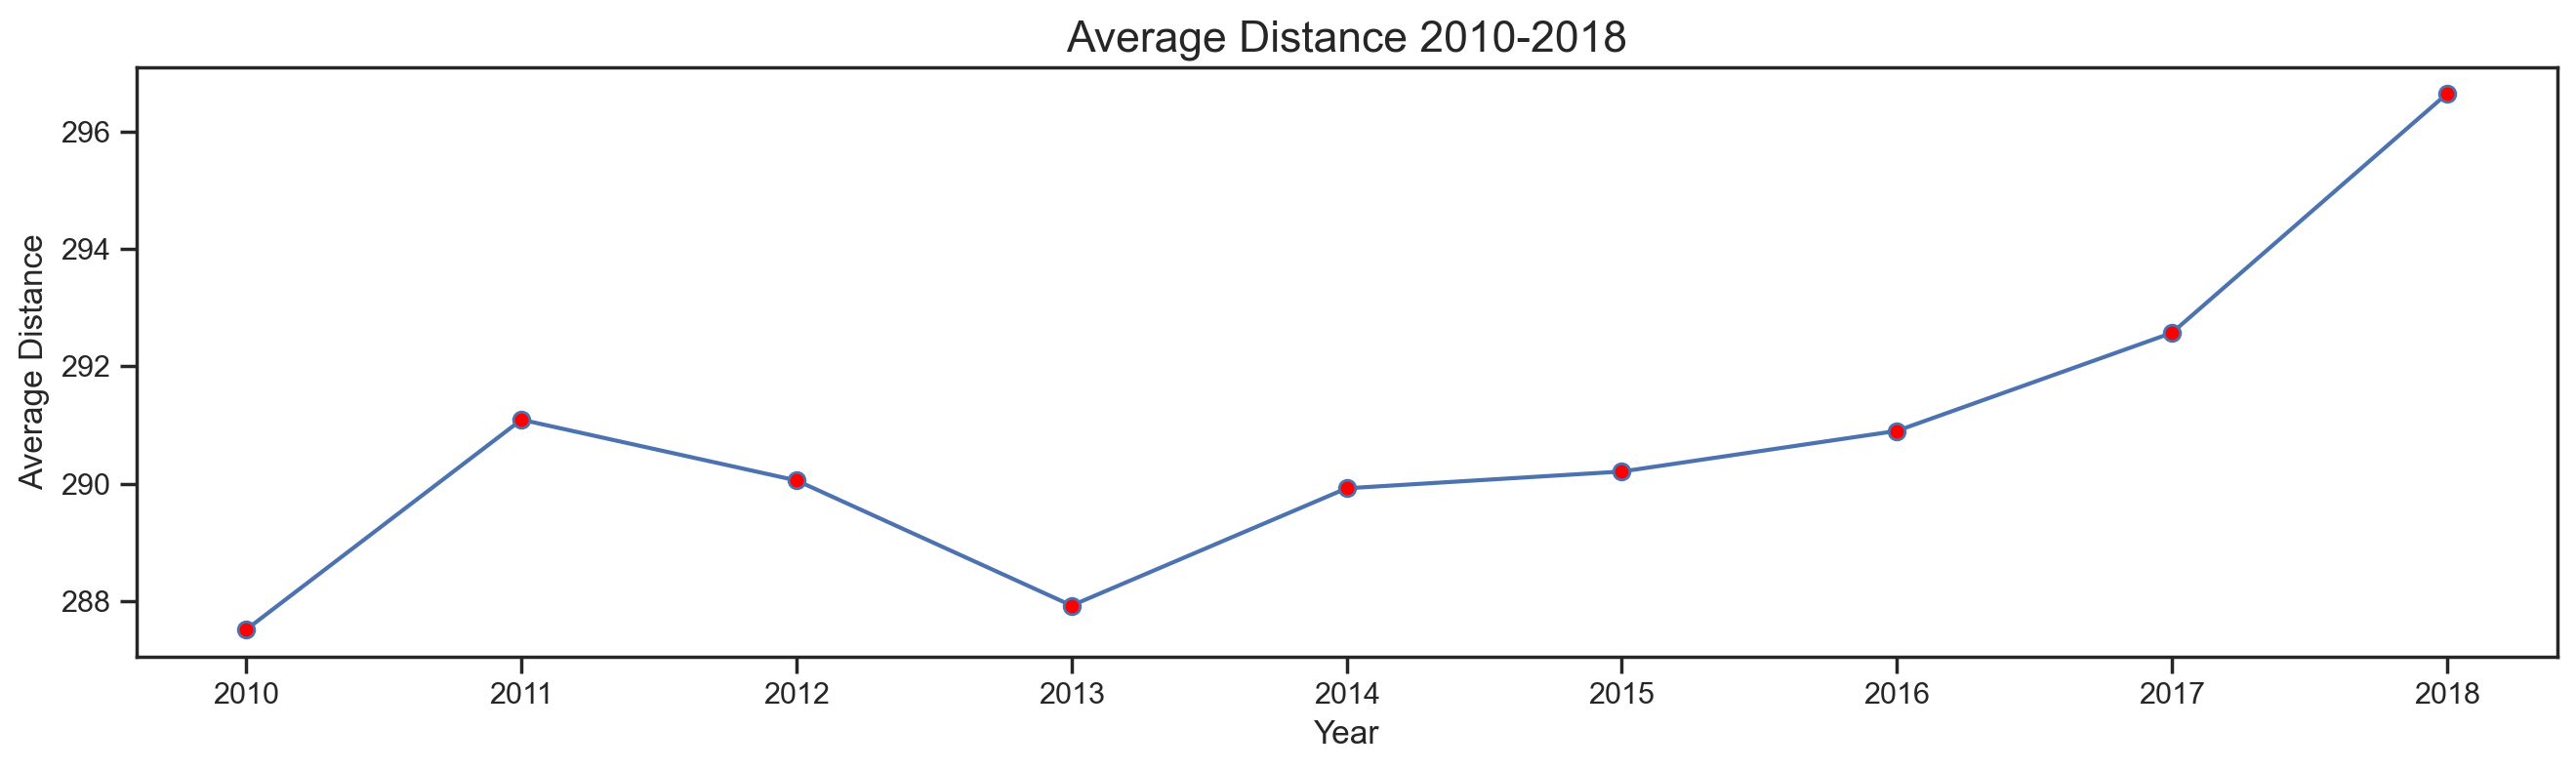

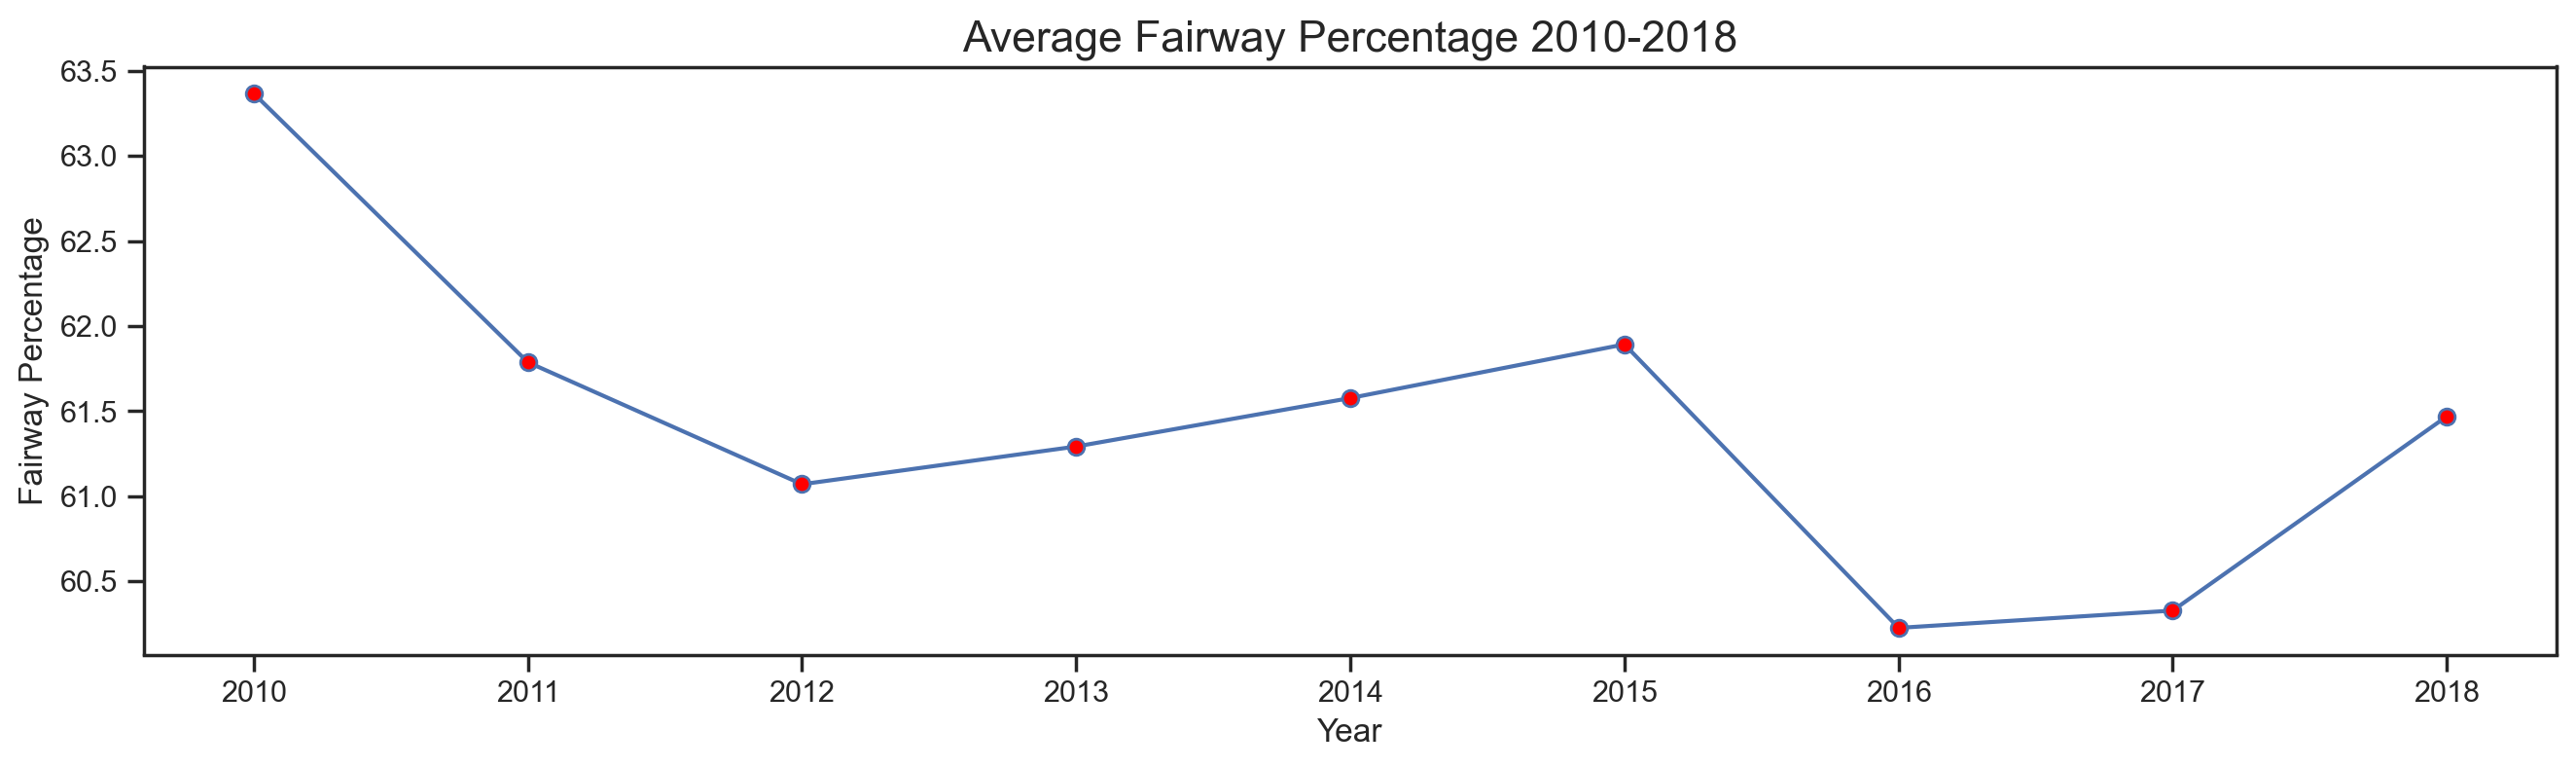

In [223]:
# Plotting Average distance vs years
plt.figure(figsize=(16, 4))
plt.plot(df.groupby('Year').mean()['Avg_Dist'], marker='o', markerfacecolor='red', markersize = 6)
plt.xlabel('Year')
plt.ylabel('Average Distance')
plt.title('Average Distance 2010-2018', fontsize=16)

# Plotting Fairway percentage vs years
plt.figure(figsize=(16, 4))
plt.plot(df.groupby('Year').mean()['Fairway_Pct'], marker='o', markerfacecolor='red', markersize = 6)
plt.xlabel('Year')
plt.ylabel('Fairway Percentage')
plt.title('Average Fairway Percentage 2010-2018', fontsize=16)

Observations:<br>
* From 2010-2018, golfers drove the ball further but showed little improvement at hitting fairways
* As shown in the correlation heatmap, average distance correlates stronger with strokes gained off-the-tee than fairway percentage, which may explain the recent trend of golfers fixating on their club/ball speed for extra power and shows how the game is evolving

#### Creating column 'long_drive' for golfers who averaged 300+ yards off-the-tee

In [224]:
df_ld = df.copy() # Copying the df

# Column gives value '1' for 300+ average distance and '0' for less than 300
df_ld['long_drive'] = df['Avg_Dist'].apply(lambda x: 1 if x>=300 else 0)
df_ld.loc[(df_ld['long_drive']==1)].shape

(243, 19)

Only 243 out of 1,674 golfers averaged 300+ yards off the tee in a year (14.516%)

#### Points vs Years comparing 300+ hitters and the field

Text(0.5, 1.0, 'Points Scored by Year')

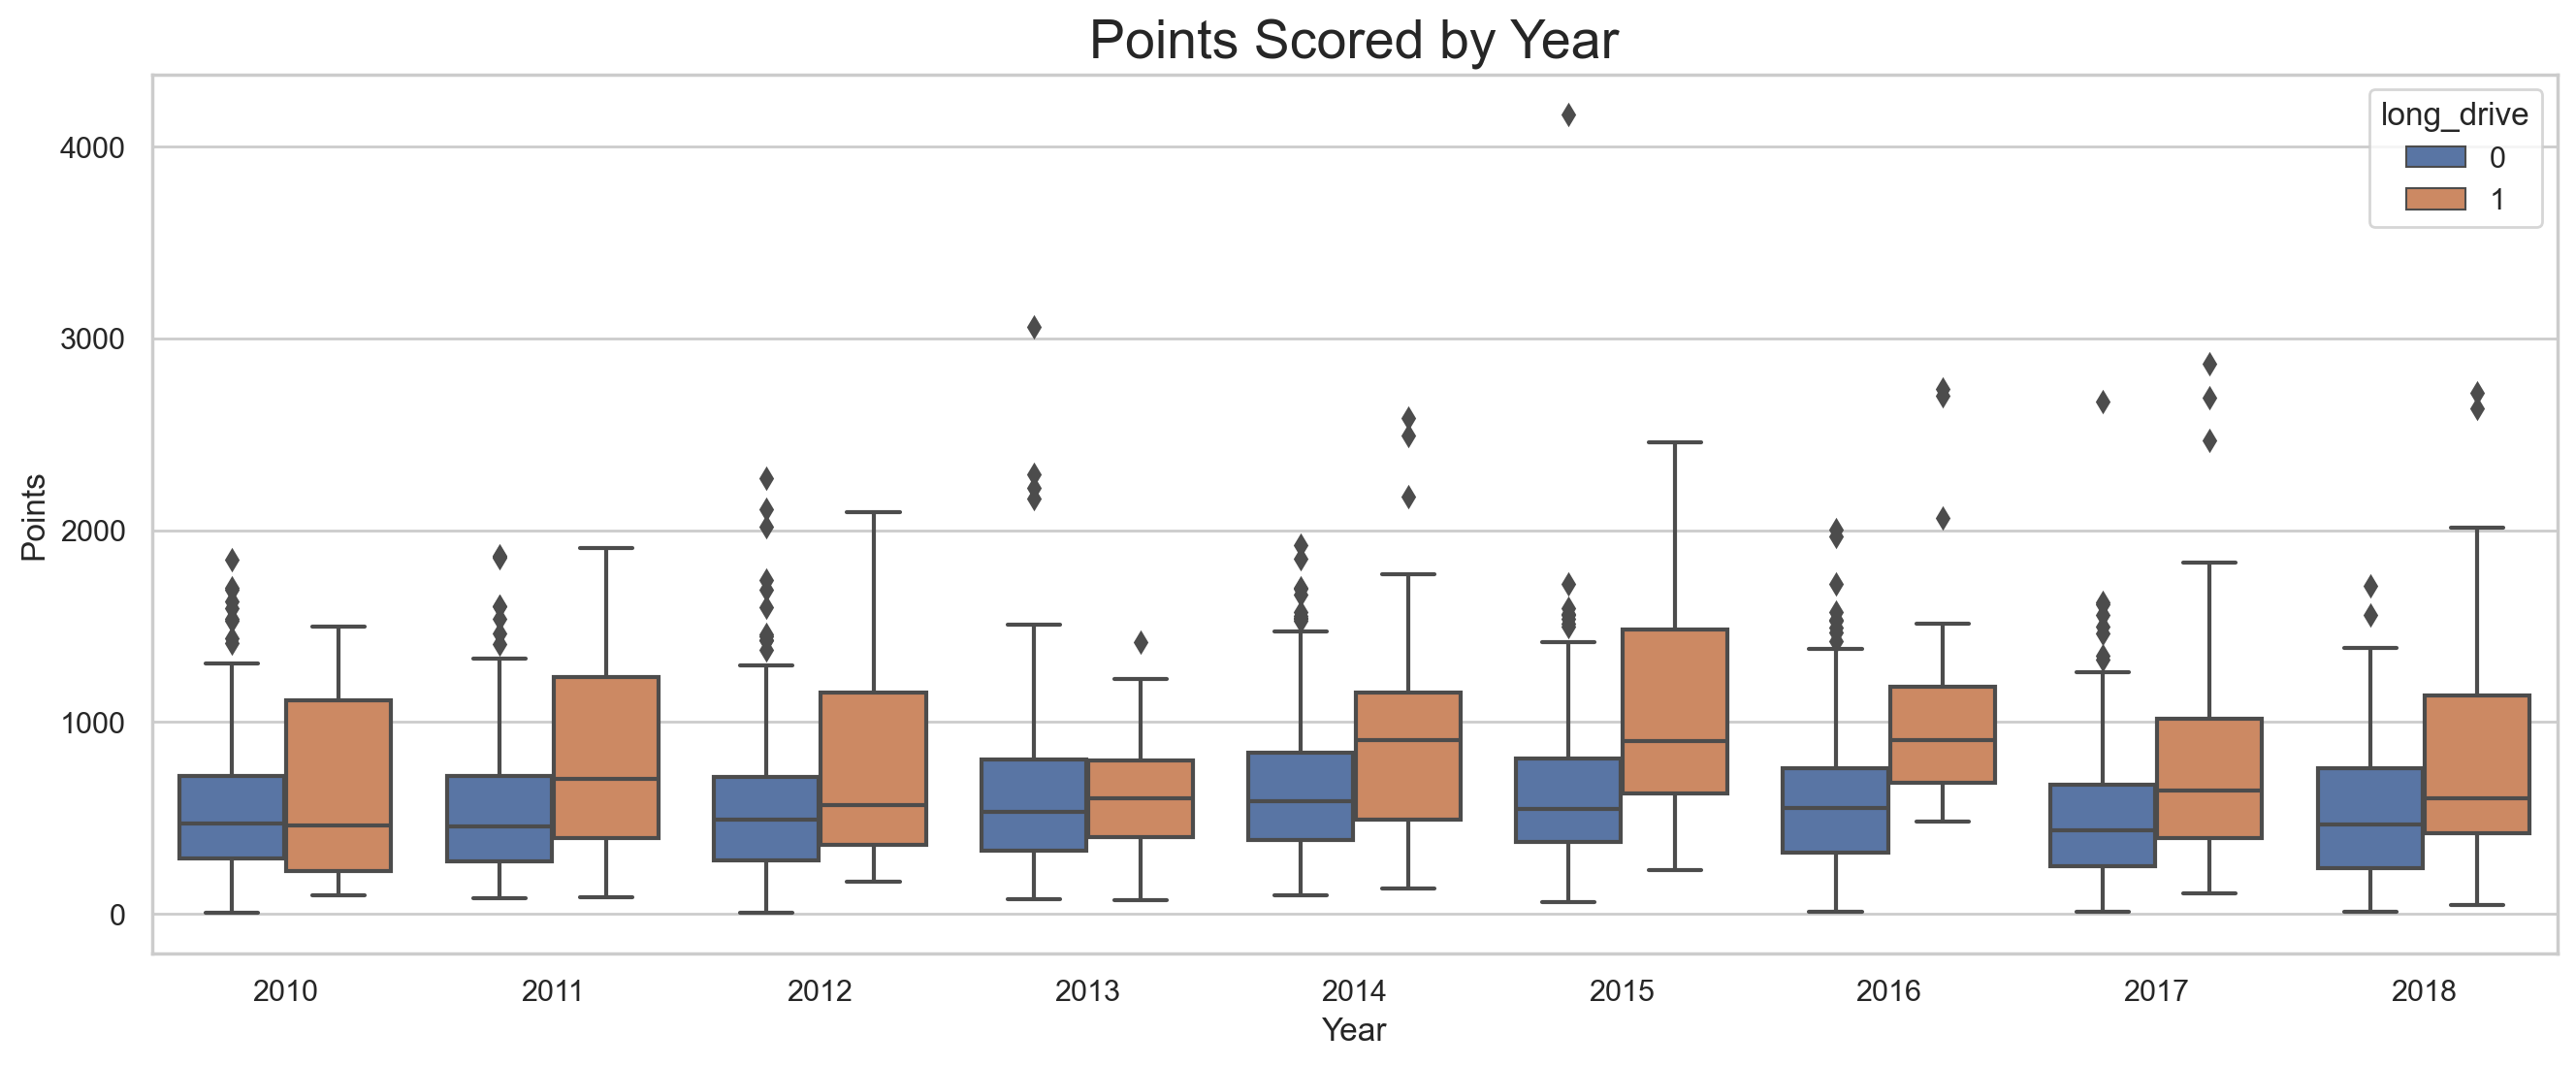

In [225]:
# Plotting points vs years grouped by 300+ hitters and the field
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
sns.boxplot(x='Year', y='Points', hue='long_drive', data=df_ld)
plt.title('Points Scored by Year', fontsize=20)

In [23]:
# Identifying the 2013 and 2015 outliers
df_ld.loc[(df_ld['long_drive'] == 0) & (df_ld['Points'] > 3000)]

,Name,Rounds,Fairway_Pct,Year,Avg_Dist,GIR,Avg_Putts,Avg_Scrambling,Avg_Score,Points,Wins,Top_10,SG_Putts,SG_Total,SG_OTT,SG_APR,SG_ARG,Money,long_drive
647,Jordan Spieth,91,62.91,2015,291.8,67.87,27.82,65.03,68.938,4169,4,14,0.571,2.154,0.494,0.618,0.471,12030465.0,0
997,Tiger Woods,61,62.50,2013,293.2,67.59,28.85,60.00,68.944,3059,5,7,0.426,2.064,-0.142,1.533,0.247,8553439.0,0


Observations:<br>
* Aside from 2010 and 2013, golfers who averaged 300+ yards off-the-tee scored unquestionably more points than their peers
* Jordan Speith (2015) and Tiger Woods (2013) scored over 3000 points while driving the ball less than 295 yards on average
* Looking at their stats, Tiger averaged a phenomenal 1.533 SG_APR (highest in the dataset) and Speith was all-around exceptional in SG categories

#### Creating 'Tier' column based on wins, top 10 finishes, and points in a year

In [228]:
# Function to define tiers based on number of wins, Top 10 finishes, and points in a given year:
def new_column(df):
    if (df['Wins'] >= 2) | (df['Top_10'] >= 10) | (df['Points'] >= 1020): #2+ wins, 10+ top 10 finishes, or 1020+ points
        return 1
    elif (df['Wins'] >= 1) | (df['Top_10'] >= 6) | (df['Points'] >= 720): #1 win, 6+ top 10 finishes, or 720+ points
        return 2
    elif (df['Wins'] >= 1) | (df['Top_10'] >= 3) | (df['Points'] >= 600): #1 win, 3+ top 10 finishes, or 600+ points
        return 3
    elif (df['Wins'] >= 1) | (df['Top_10'] >= 2) | (df['Points'] >= 450): #1 win, 2+ top 10 finishes, or 450+ points
        return 4
    elif (df['Wins'] >= 1) | (df['Top_10'] >= 1) | (df['Points'] >= 375): #1 win, 1 top 10 finish, or 375+ points
        return 5
    else:                                        #No wins, top 10 finishes and less than 375 points
        return 6                                 

df['Tier'] = df.apply(new_column, axis=1)
df['Tier'].value_counts()

4    285
6    285
3    282
2    276
5    274
1    272
Name: Tier, dtype: int64

Tier 1: 272 golfers (16.25%)<br>Tier 2: 276 golfers (16.49%)<br>Tier 3: 282 golfers (16.85%)<br>Tier 4: 285 golfers (17.03%)<br>Tier 5: 274 golfers (16.37%)<br>Tier 6: 285 golfers (17.03%)

#### Comparing performance metrics of Tier 1 golfers vs the PGA Tour average by year

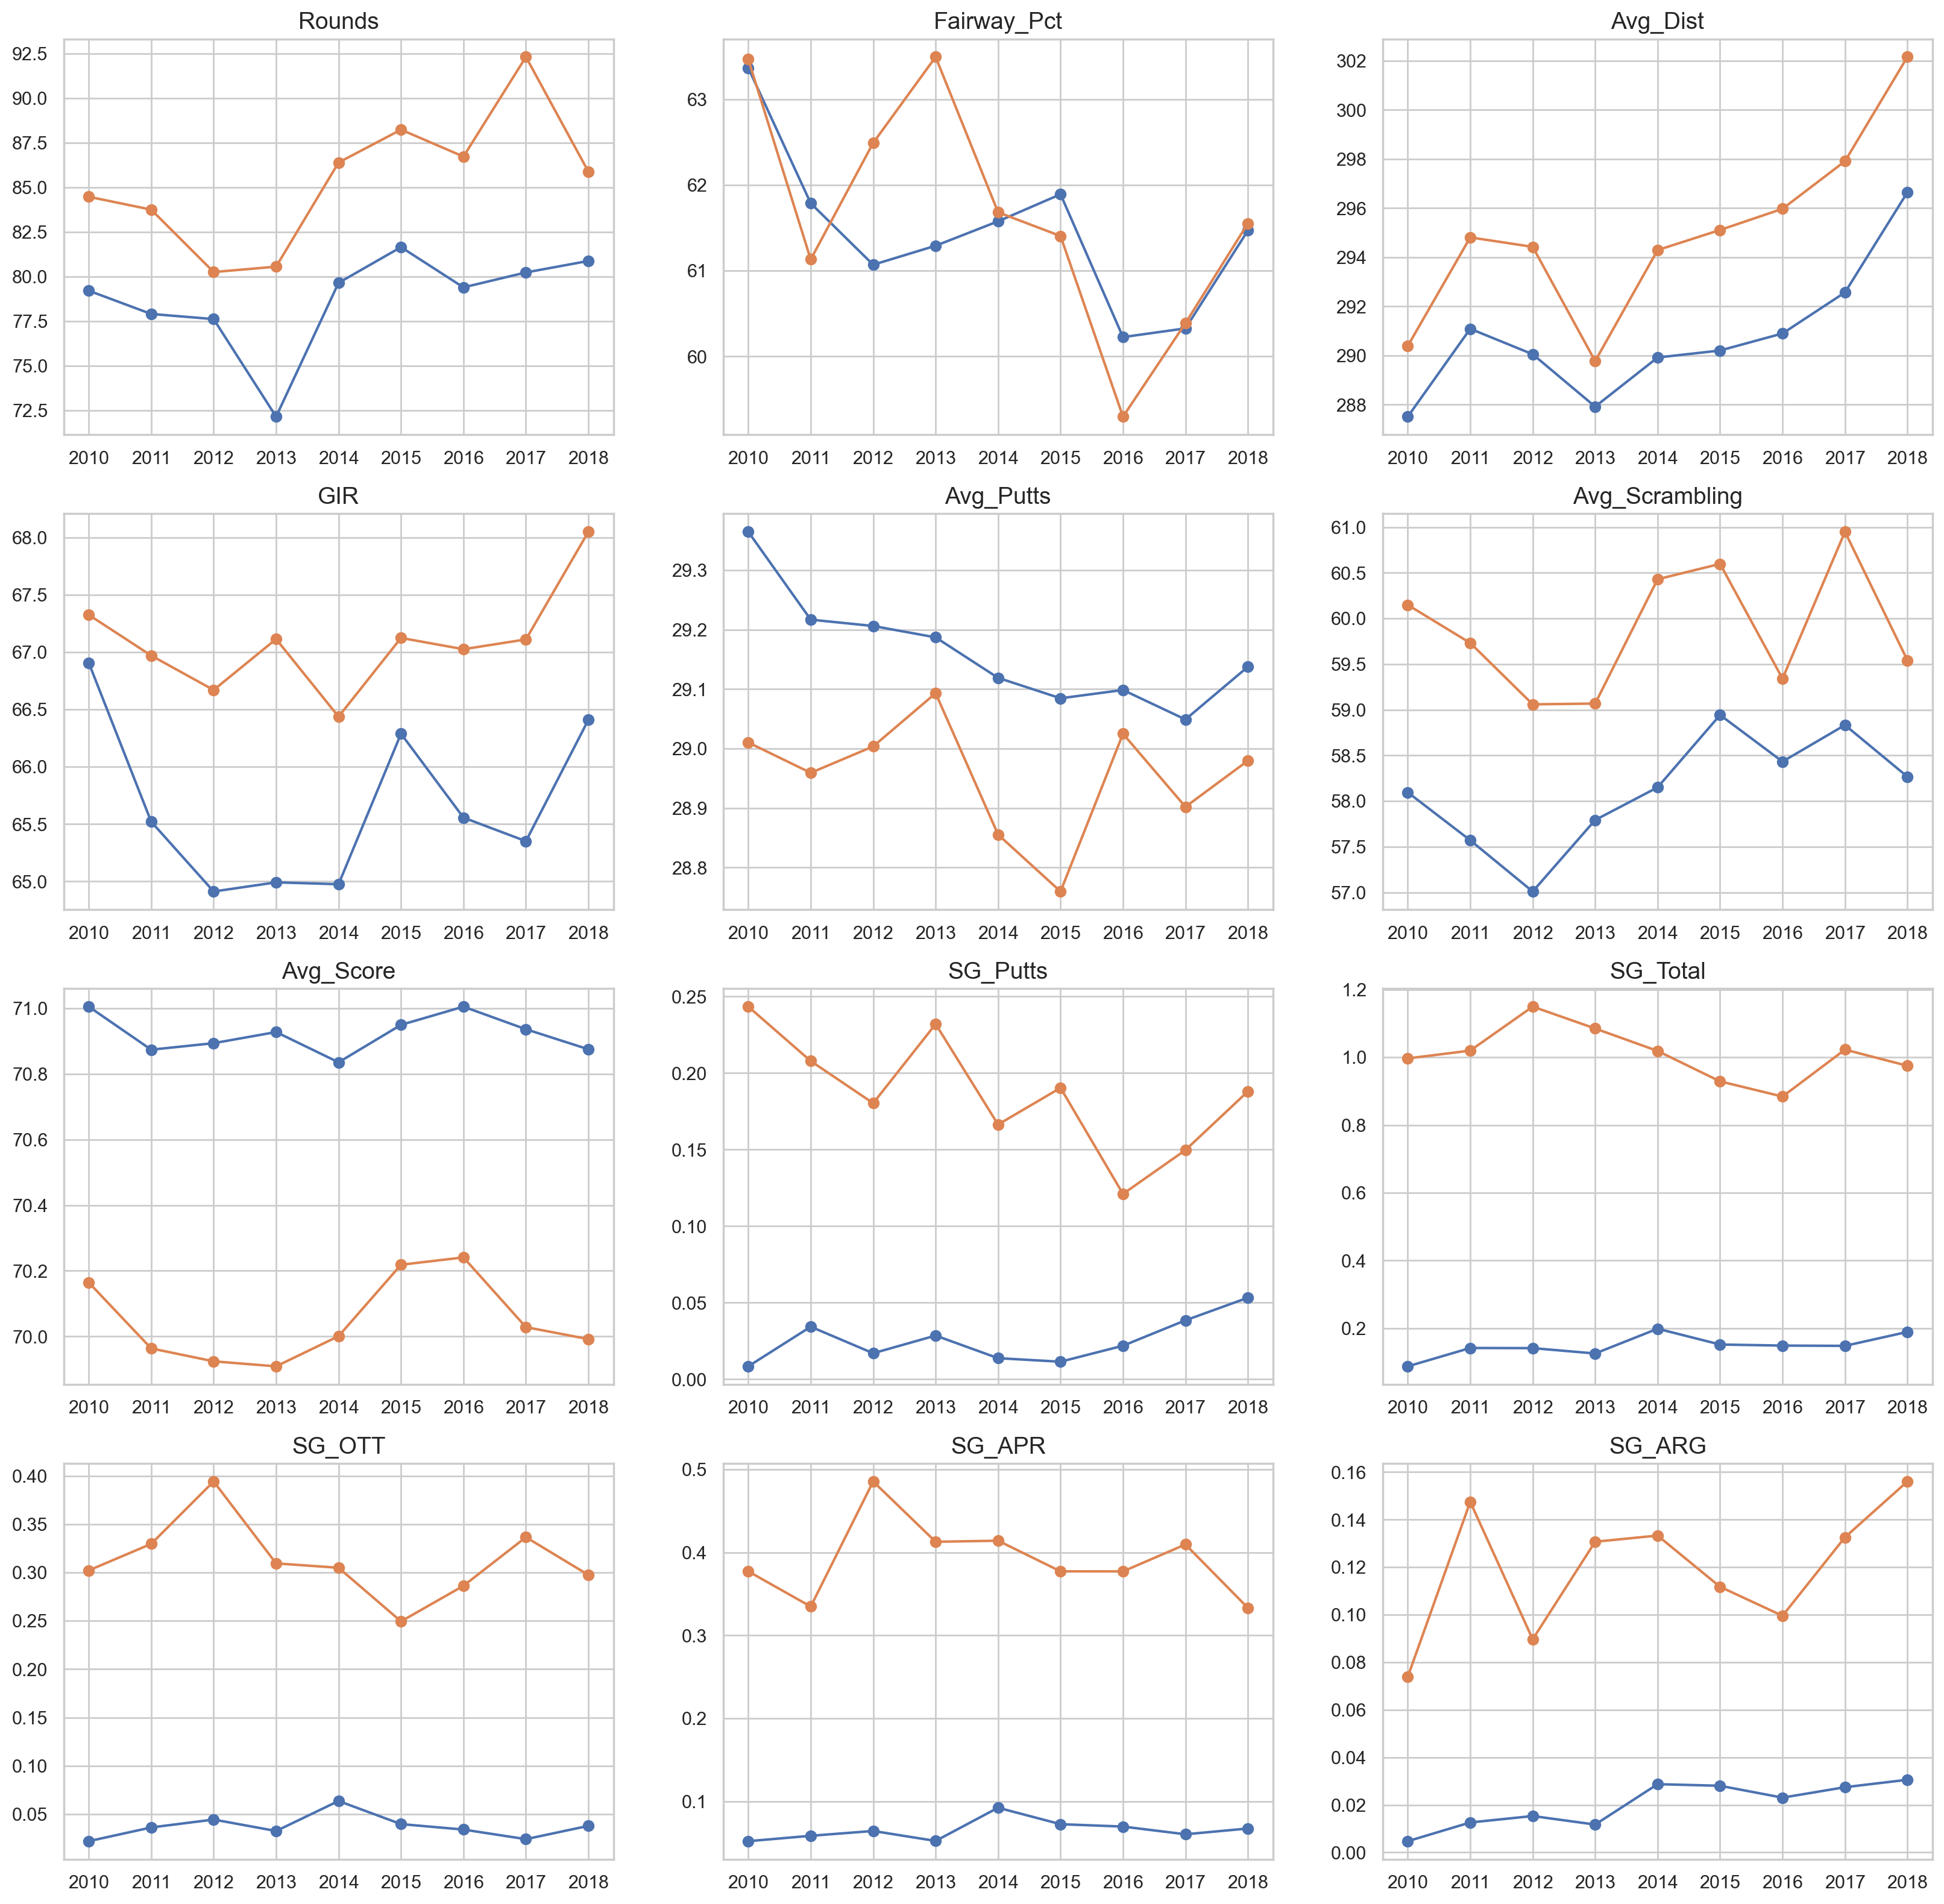

In [230]:
top_tier = df.loc[df['Tier'] == 1] # Defining the Tier 1 players

f, ax = plt.subplots(nrows = 4, ncols = 3, figsize=(20,20)) # Create subplots

# Identifying and storing columns in list 'distribution'
distr = df.loc[:,(df.columns!='Name') & (df.columns!='Points') & (df.columns!='Wins') & 
               (df.columns!='Top_10') & (df.columns!='Money') & (df.columns!='Tier')].columns
distr = distr[distr != 'Year']

# Plot 'average' and 'tier_1' value for each of the columns in the distribution
rows = 0
cols = 0
for element, column in enumerate(distr):
    avg = df.groupby('Year')[column].mean()
    tier_1 = top_tier.groupby('Year')[column].mean()
    ax[rows,cols].plot(avg, 'o-',)
    ax[rows,cols].plot(tier_1, 'o-',)
    ax[rows,cols].set_title(column, fontsize = 14)
    
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

Observations:
* Interestingly, some of the sub-plot lines shared similar trends while others were completely different 
* For the most part, Avg_Dist, GIR, and Avg_Scrambling resembled one another in sharp increases/decreases, which I am assuming was due to external factors such as course difficulty, weather conditions, or rule change in a given year
* Fairway_Pct was fascinating to observe because the tour average was better or about even with the top tier in every year besides 2012 and 2013
* The strokes gained metrics showed a massive gap between the two groups, but slightly evened out in 2016 which was abnormal 

#### Creating column of 3 'Tiers' of golfers by mapping the Tier column

In [231]:
# Creating categorical "Tiers" column
df['Tiers'] = df['Tier'].map({1:"Top",2:"Top",3:"Middle",4:"Middle",5:"Bottom",6:"Bottom",}).astype('category')
df.Tiers.value_counts()

Middle    567
Bottom    559
Top       548
Name: Tiers, dtype: int64

Top Tier: 548 golfers (32.74%)<br>
Middle Tier: 567 golfers (33.87%)<br>
Bottom Tier: 559 golfers (33.39%)

#### Number of golfers grouped by Tier from 2010-2018

<Figure size 1200x800 with 0 Axes>

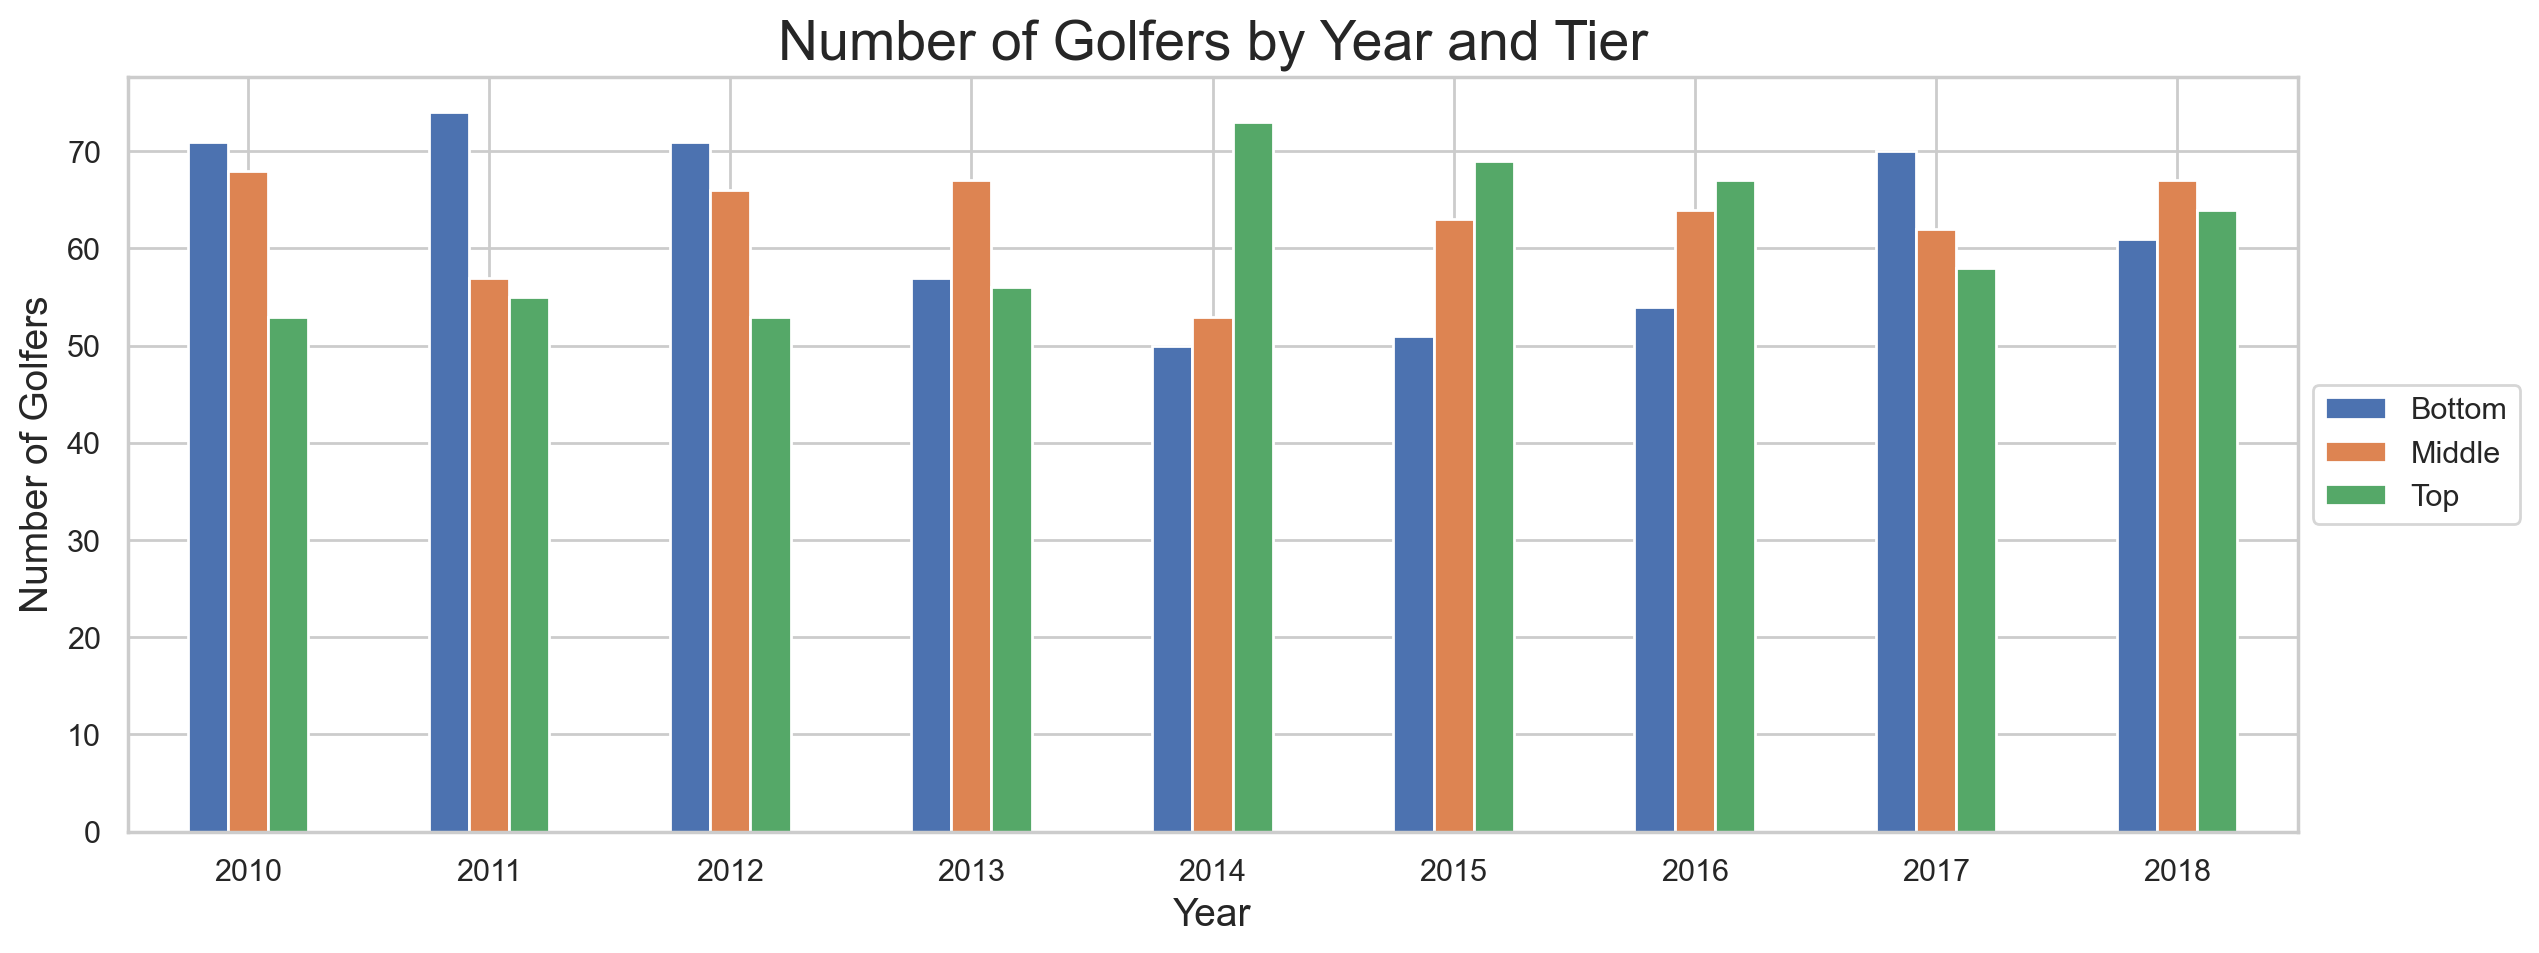

<Figure size 1200x800 with 0 Axes>

In [232]:
# Creating a bar chart to show the number of golfers in each group.
year_tiers = df.groupby(['Year', 'Tiers']).size().unstack()
year_tiers.plot(kind='bar', stacked=False, figsize=(14, 5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=0)
plt.title('Number of Golfers by Year and Tier', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Golfers', fontsize=14)
plt.figure()

Fairly even distribution of golfers by tier in each year

#### Creating dataframe 'SG_df' of strokes gained averages with Tiers as the index, standardizing the strokes gained variables

In [233]:
SG_df = df[['SG_Putts', 'SG_OTT', 'SG_APR', 'SG_ARG', 'Tiers']] # Making storkes gained dataframe

# Filtering by tiers and calculating average
top_avg = pd.DataFrame([SG_df.loc[df['Tiers'] == "Top"].mean()])
middle_avg = pd.DataFrame([SG_df.loc[df['Tiers'] == "Middle"].mean()])
bottom_avg = pd.DataFrame([SG_df.loc[df['Tiers'] == "Bottom"].mean()])

# Combining the dataframes and setting the indexes
SG_avgs = pd.concat([top_avg, middle_avg, bottom_avg])
SG_avgs = SG_avgs.set_index([pd.Index(['Top Tier', 'Middle Tier', 'Bottom Tier'])])

# Using scikit-learn StandardScaler to normalize values in SG_Putts, SG_OTT, SG_APR, and SG_ARG columns
from sklearn.preprocessing import StandardScaler
SG_vars=['SG_Putts', 'SG_OTT', 'SG_APR', 'SG_ARG']
sc=StandardScaler()
SG_avgs[SG_vars]=sc.fit_transform(SG_avgs[SG_vars])

#### Bar Graph of standardized strokes gained averages grouped by Tier

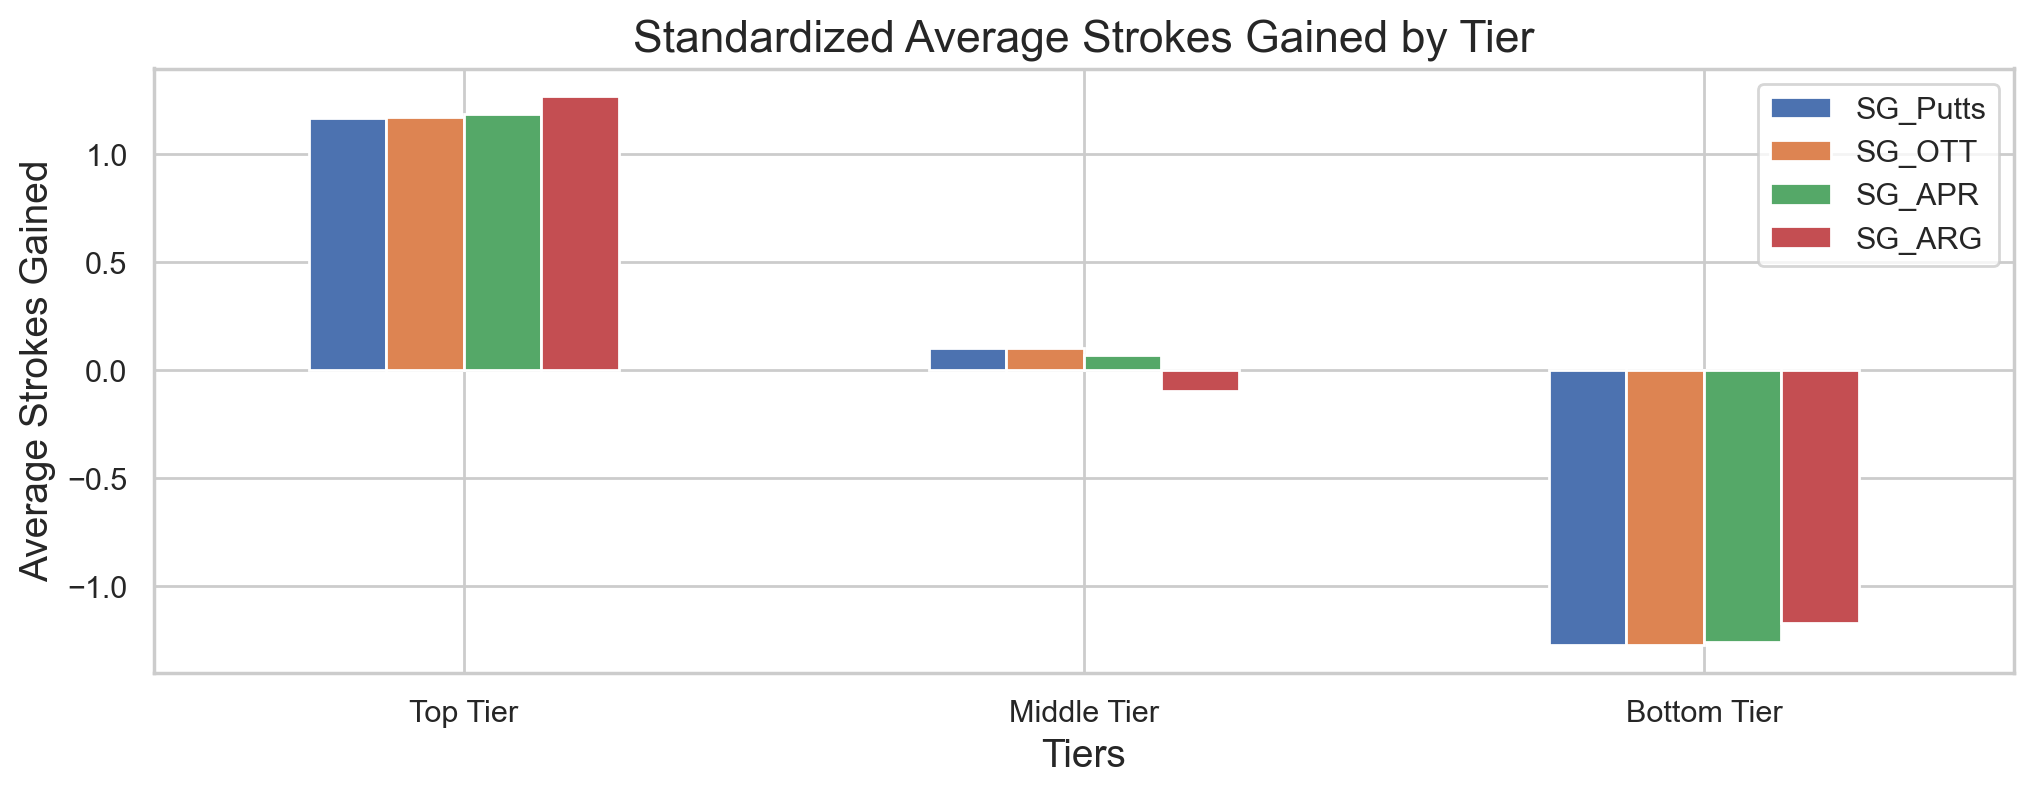

In [29]:
# Plotting the data
SG_avgs.plot.bar(rot=0, figsize=(12, 4))
plt.xlabel('Tiers', fontsize=14)
plt.ylabel('Average Strokes Gained', fontsize=14)
plt.title('Standardized Average Strokes Gained by Tier', fontsize=16)
plt.legend(loc="upper right")
plt.show()

Observations:<br>
* Overall, the graph portrays the tremendous impact strokes gained metrics have in determining the succss of a golfer
* Since the variables are in standard normal distribution and their mean is 0, middle Tier golfers are nearly average in every category, but relatively struggle in strokes gained around-the-green

#### Density plot of player earnings ('Money') by tiers

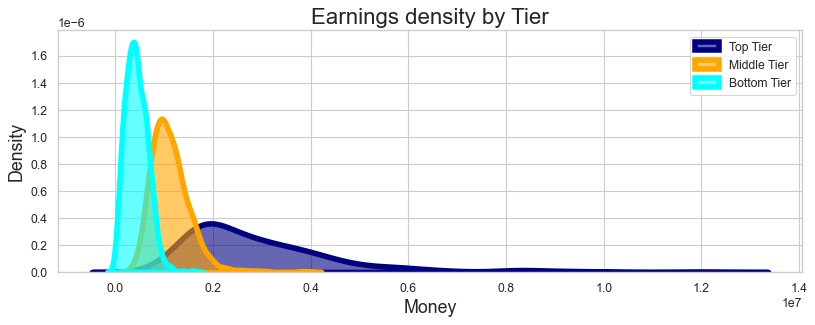

In [235]:
plt.figure(figsize=(12,4), dpi= 80) # Density Plot
# Top Tier
sns.kdeplot(df.loc[df['Tiers'] == 'Top', "Money"], shade=True, color="navy", label="Top Tier", lw=5, alpha=.6)
# Middle Tier
sns.kdeplot(df.loc[df['Tiers'] == 'Middle', "Money"], shade=True, color="orange", label="Middle Tier", lw=5, alpha=.6)
# Bottom Tier
sns.kdeplot(df.loc[df['Tiers'] == 'Bottom', "Money"], shade=True, color="aqua", label="Bottom Tier", lw=5, alpha=.6)
# Lables
plt.title('Earnings density by Tier', fontsize=20)
plt.xlabel('Money', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()

Observations:
* Nearly every bottom tier golfer earned less than $1,000,000 and the vast majority of middle tier golfers earned less than 2,000,000
* Most top tier golfers earned in the wider range of 1,500,000 - 4,000,000 and very few earned greater than 6,000,000

In [236]:
# Identifying the outlier
df.loc[(df['Money'] >= 10000000) & (df['Tiers'] == 'Top')]

,Name,Rounds,Fairway_Pct,Year,Avg_Dist,GIR,Avg_Putts,Avg_Scrambling,Avg_Score,Points,Wins,Top_10,SG_Putts,SG_Total,SG_OTT,SG_APR,SG_ARG,Money,Tier,Tiers
647,Jordan Spieth,91,62.91,2015,291.8,67.87,27.82,65.03,68.938,4169,4,14,0.571,2.154,0.494,0.618,0.471,12030465.0,1,Top


Once again, 2015 Jordan Spieth is the outlier who earned over 12 million dollars winning 4 tournaments along with 14 top 10 finishes

## 4. <a id='section_4'>Supervised Machine Learning - Classification</a>
<a href='#TOC'>Back to table of Contents</a>
### Goals:
* **Perform logistic regression, random forest classifier, and k-nearest neighbors models to predict if a golfer is a 'TopPlayer' and compare their performance results**
* **Calculate the feature importance of the best models to identify which variables are contributing most to the classification**

In [238]:
# Importing the Machine Learning modules
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE

### Classification pre-processing

#### Creating a 'TopPlayer' column to use as the target variable
- 1 = Golfer is in the top 3 Tiers, has at least 1 Win, 3+ Top 10 finishes, or 600+ Points in a given year
- 0 = Golfer is not in the top 3 Tiers, has 0-1 Wins, less than 3 Top 10 finishes, and less than 600 Points in a given year

In [241]:
df_clf = df.copy() # Copying df

# Creating categorical TopPlayer column
df_clf['TopPlayer'] = df['Tier'].map({1:1,2:1,3:1,4:0,5:0,6:0,})
df_clf.TopPlayer.value_counts()

0    844
1    830
Name: TopPlayer, dtype: int64

50.418% of golfers are not a 'TopPlayer' and and 49.582% are a 'TopPlayer'

In [242]:
# Dropping columns that are non-related to specific performance metrics
df_clf.drop(['Name', 'Rounds', 'Fairway_Pct', 'Year', 'Avg_Putts', 'Avg_Score', 'Points', 'Wins', 
             'Top_10', 'SG_Total', 'Money', 'Tier', 'Tiers'], axis=1, inplace=True)

df_clf.corr()['TopPlayer'].sort_values(ascending = False) # Checking correlation

TopPlayer         1.000000
SG_APR            0.416550
SG_OTT            0.372150
Avg_Scrambling    0.242262
GIR               0.240615
Avg_Dist          0.222913
SG_Putts          0.211407
SG_ARG            0.188589
Name: TopPlayer, dtype: float64

In [243]:
# Assigning variables
x = df_clf.copy() # Set x
x.drop(['TopPlayer'], axis=1, inplace=True) # Dropping target variable
y = df_clf['TopPlayer'] # Set y
x.columns

Index(['Avg_Dist', 'GIR', 'Avg_Scrambling', 'SG_Putts', 'SG_OTT', 'SG_APR',
       'SG_ARG'],
      dtype='object')

In [244]:
# Split data into training and testing sets (75%-25%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 0)

#### Random Forest Classifier

In [245]:
# Initialize and run the random forest
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(x_train, y_train)

# Predictions
rfc_train_pred = rfc.predict(x_train)
rfc_test_pred = rfc.predict(x_test)

#### Logistic Regression

In [246]:
# Initialize and run the logistic regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Predictions
lr_train_pred = lr.predict(x_train)
lr_test_pred = lr.predict(x_test)

#### K-nearest Neighbors Classifier

The KNN algorithm relies on distance measures to identify the nearest neighbors, and if the features are on different scales, the distances can be distorted and the algorithm can produce inaccurate results.

#### Scaling features to meet the knn  assumption

In [247]:
# Scaling the independent variables
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [261]:
# Initialize and run the Knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Predictions
knn_train_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)

### Evaluating Performance Metrics

`Accuracy:` The proportion of predictions that are correct<br>
`Precision:` The proportion of true positives among all positive predictions<br>
`Recall:` The proportion of true positives among all actual positives<br>
`F1-Score:` A measure of a model's accuracy that takes both precision and recall into account, calculated as the harmonic mean of precision and recall

In [262]:
# Function to calculate accuracy, precision, recall, and f1-score for the true class(y_test) and prediction(y_pred)
def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1-score: {f1:.3f}')

In [263]:
# Creating confusion matrices for rfc, lr, and knn
rfc_conf= confusion_matrix(y_test, rfc_test_pred)
lr_conf= confusion_matrix(y_test, lr_test_pred)
knn_conf= confusion_matrix(y_test, knn_test_pred)

Random Forest
Accuracy: 0.797, Precision: 0.817, Recall: 0.775, F1-score: 0.795

Logistic Regression
Accuracy: 0.811, Precision: 0.813, Recall: 0.817, F1-score: 0.815

KNN
Accuracy: 0.735, Precision: 0.768, Recall: 0.685, F1-score: 0.725


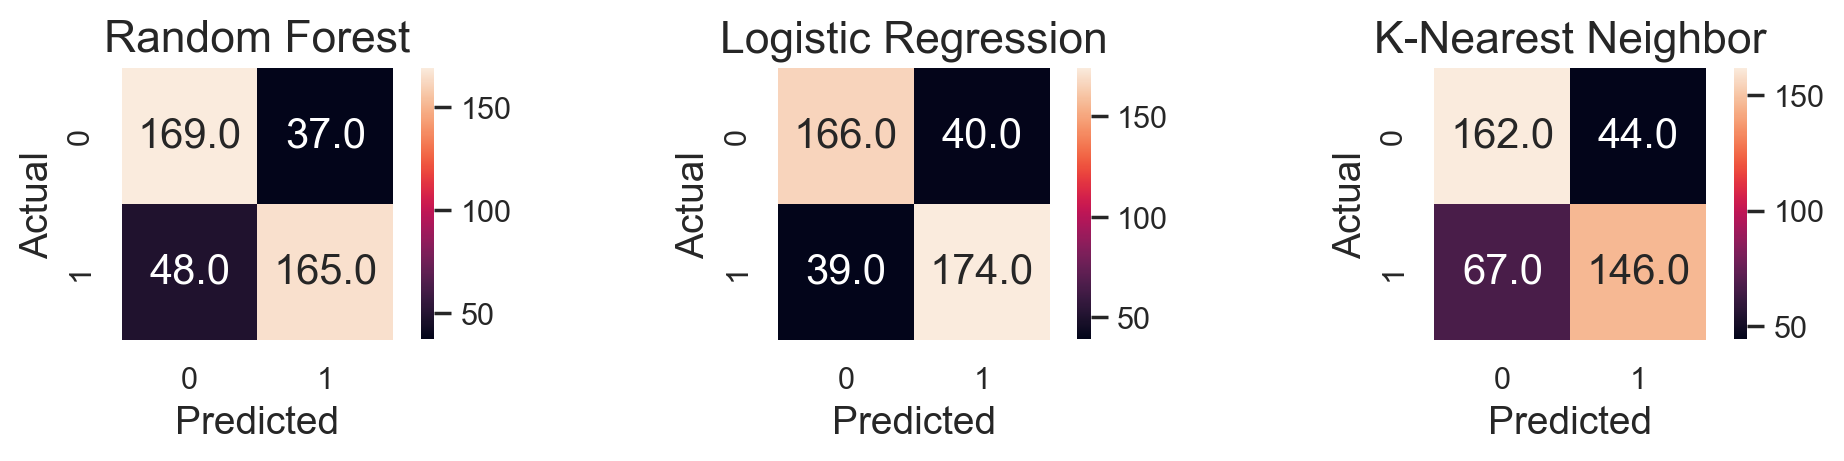

In [264]:
# Plotting confusion matrices
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,1.8))
sns.heatmap(rfc_conf, annot=True, fmt=".1f", square = True, annot_kws={"size": 15}, cbar_kws={"shrink": 1}, ax=ax[0]);
sns.heatmap(lr_conf, annot=True, fmt=".1f", square = True, annot_kws={"size": 15}, cbar_kws={"shrink": 1}, ax=ax[1]);
sns.heatmap(knn_conf, annot=True, fmt=".1f", square = True, annot_kws={"size": 15}, cbar_kws={"shrink": 1}, ax=ax[2]);
ax[0].set_title('Random Forest', fontsize=16)
ax[1].set_title('Logistic Regression', fontsize=16)
ax[2].set_title('K-Nearest Neighbor', fontsize=16)
ax[0].set_ylabel('Actual', fontsize=14);
ax[1].set_ylabel('Actual', fontsize=14);
ax[2].set_ylabel('Actual', fontsize=14);
ax[0].set_xlabel('Predicted', fontsize=14);
ax[1].set_xlabel('Predicted', fontsize=14);
ax[2].set_xlabel('Predicted', fontsize=14);

# Printing performance metrics
print('Random Forest')
calculate_metrics(y_test, rfc_test_pred)
print()
print('Logistic Regression')
calculate_metrics(y_test, lr_test_pred)
print()
print('KNN')
calculate_metrics(y_test, knn_test_pred)

From the performance scores, we can see that Logistic Regression has the highest accuracy score at 0.811, followed by Random Forest at 0.797, and KNN at 0.735. Additionally, we can see that Logistic Regression has the highest recall and F1-score, indicating that it is the most effective model for making accurate predictions. This could be due to its ability to handle complex relationships and nonlinear patterns in data.<br><br>Random Forest also presents good results, indicating that it is able to accurately identify patterns in the data and make accurate predictions. However, KNN is the least accurate model, with a lower accuracy and F1-score compared to the other two models. This could be due to its reliance on a small number of nearest neighbors, which could lead to overfitting or underfitting of the data. Overall, Logistic Regression appears to be the best model for predicting the outcome of the given data.

### Evaluating ROC AUC

`ROC AUC:` The measure of how well the model is able to distinguish between the two classes by plotting the true positive rate (TPR) against the false positive rate (FPR). The higher the AUC, the better the model's performance, with an AUC of 1 indicating a perfect classifier.

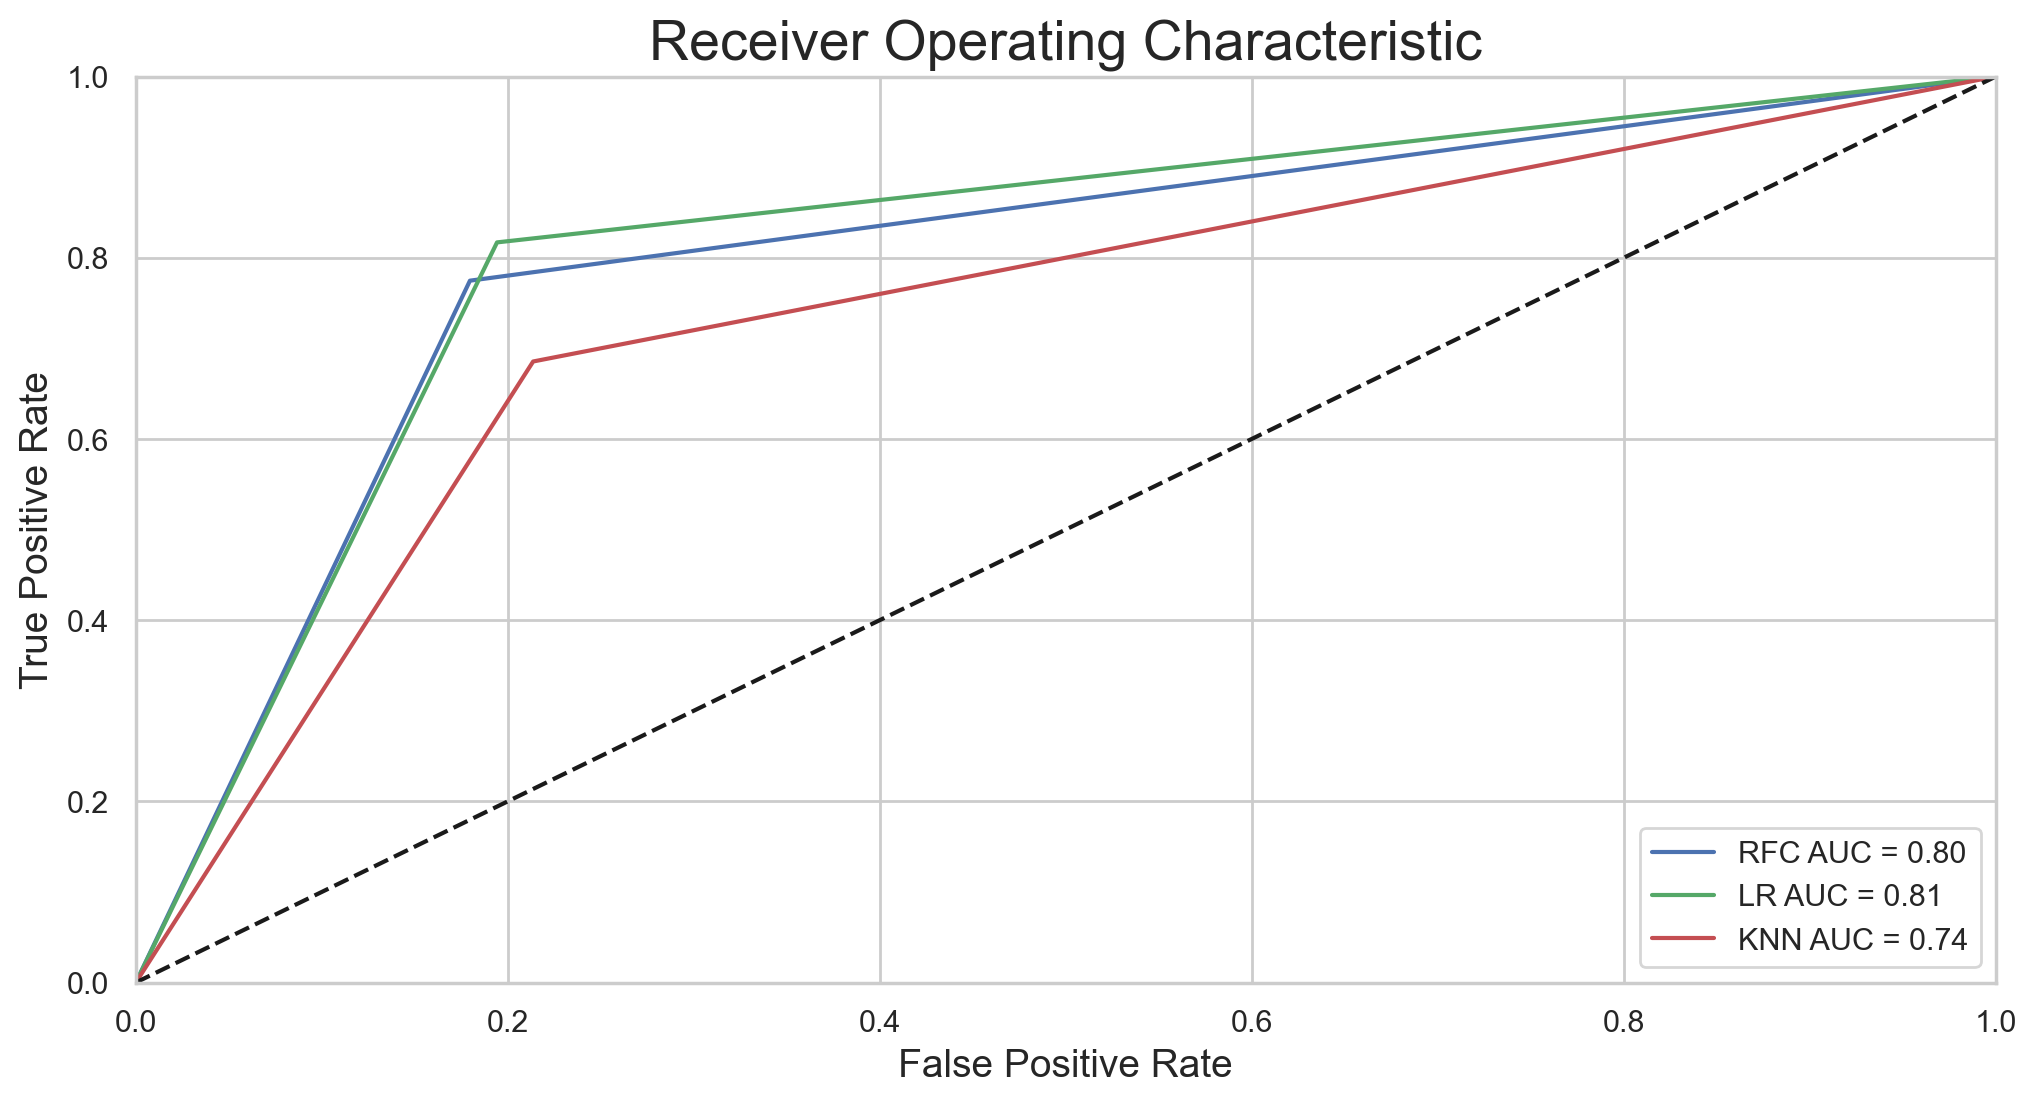

In [265]:
# Using metrics.roc_curve to obtain FPR and TPR values from the y_test and model-specific test set prediction
fpr_rfc, tpr_rfc, threshold = metrics.roc_curve(y_test, rfc_test_pred)
fpr_lr, tpr_lr, threshold = metrics.roc_curve(y_test, lr_test_pred)
fpr_knn, tpr_knn, threshold = metrics.roc_curve(y_test, knn_test_pred)

# Calculating the area under the curve (AUC) of the models
rfc_roc_auc = metrics.auc(fpr_rfc, tpr_rfc)
lr_roc_auc = metrics.auc(fpr_lr, tpr_lr)
knn_roc_auc = metrics.auc(fpr_knn, tpr_knn)

# Plotting the ROC AUC
plt.figure(figsize=(12, 6))
plt.title('Receiver Operating Characteristic', fontsize=20)
plt.plot(fpr_rfc, tpr_rfc, 'b', label = 'RFC AUC = %0.2f' % rfc_roc_auc)
plt.plot(fpr_lr, tpr_lr, 'g', label = 'LR AUC = %0.2f' % lr_roc_auc)
plt.plot(fpr_knn, tpr_knn, 'r', label = 'KNN AUC = %0.2f' % knn_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.show()

The RFC model had an AUC score of 0.80, the LogR model had an AUC score of 0.81, and the KNN model had the lowest AUC score of 0.74. This suggests that the RFC and LogR models were better at distinguishing between positive and negative classes. <br><br>This is likely because the RFC and LogR models both use algorithms that can learn from data and make predictions, while the KNN model is a simple classification algorithm that simply compares the data points to their nearest neighbors. Therefore, the more complex algorithms of RFC and LogR were able to better identify patterns in the data and make more accurate predictions.

### Cross Validation

In [266]:
# Running the cross_val_score() function algorithm 10 times and taking the mean of all the scores
algo_scores = {}
algo_scores['RandomForestClassifier'] = np.mean(cross_val_score(RandomForestClassifier(), x, y, cv=10))
algo_scores['LogisticRegression'] = np.mean(cross_val_score(LogisticRegression(), x, y, cv=10))
algo_scores['KNeighborsClassifier'] = np.mean(cross_val_score(KNeighborsClassifier(), x, y, cv=10))

for algo, score in algo_scores.items():
    print(f'{algo} CV mean accuracy score {score}')
    print()

RandomForestClassifier CV mean accuracy score 0.7670587396635301

LogisticRegression CV mean accuracy score 0.7969275734245793

KNeighborsClassifier CV mean accuracy score 0.627826489877388



The RFC model had a 10-fold cross validation score accuracy score of 0.767, LogR model scored 0.797, and KNN model had an accuracy score of 0.628. This is another indicator that the RFC and LogR models are better suited for this problem than the KNN model.

### Feature Importance

In [267]:
# Ranking the logR model feature importance using coef_ attribute
feature_names = x.columns
importances_lr = lr.coef_[0] 
indices_lr = np.argsort(importances_lr)[::-1]

# Ranking the RFC feature importance using the feature_importances_ attribute
importances_rfc = rfc.feature_importances_ 
sorted_importances_rfc = sorted(zip(x, importances_rfc), key=lambda x: x[1], reverse=True)

# Printing the sorted ranking
print("Logistic Regression Feature ranking:")
for f in range(x.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices_lr[f]], importances_lr[indices_lr[f]]))

print()
print("Random Forest Feature ranking:")
i = 1
for feature, importance in sorted_importances_rfc:
    print(f'{i}. {feature} ({importance})')
    i += 1

Logistic Regression Feature ranking:
1. SG_APR (3.358413)
2. SG_OTT (3.186156)
3. SG_Putts (2.652795)
4. SG_ARG (2.146182)
5. Avg_Dist (0.025856)
6. Avg_Scrambling (0.019507)
7. GIR (-0.135973)

Random Forest Feature ranking:
1. SG_APR (0.21133427550168815)
2. SG_OTT (0.1789730320739946)
3. SG_Putts (0.15127963819710008)
4. SG_ARG (0.12879566064192646)
5. Avg_Scrambling (0.11825576522646579)
6. GIR (0.1074172937433117)
7. Avg_Dist (0.10394433461551317)


One interesting observation from the feature importance rankings of both the models is that SG_APR is the most important feature. This indicates that the player's approach play has the most influence on the player's performance. The other important features for both models include SG_OTT, SG_Putts, and SG_ARG. It is also interesting to note that Avg_Dist is the least important feature for RFC, but ranked 5th for the LogR model. GIR appears to be the least important feature overall which is surprising.

## 5. <a id='section_5'>Supervised Machine Learning - Regression</a>
<a href='#TOC'>Back to table of Contents</a>
#### Goals: 
* **Execute regression models to predict the earnings (Money) of a golfer and and compare their performance results**
* **Calculate the feature importance of each model to determine which aspect of a player's golfing game translates to success on the golf course**

The assumptions of Linear regression Models is as follows:
1. `No collinearity:` if you have highly correlated predictors, it’s most likely your model will overfit
2. `No noise:` eg. that there are no outliers in the data
3. `Normal distribution:` more reliable predictions are made if the predictors and the target variable are normally distributed
4. `Scale:` it’s a distance-based algorithm, so preditors should be scaled — like with standard scaler

In [268]:
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.metrics import r2_score
from scipy import stats
from statsmodels.regression.linear_model import OLS
from scipy.stats import norm, skew 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error

### Regression pre-processing

In [269]:
df_reg = df.copy() # Copying df

# Dropping columns that are unrelated to specific performance metrics
df_reg.drop(['Name', 'Rounds', 'Year', 'Avg_Score', 'SG_Total', 'Points', 'Wins', 'Top_10', 'Avg_Putts',
             'Tier', 'Tiers'], axis=1, inplace=True)
df_reg['adj_Avg_Putts'] = (58 - df['Avg_Putts']) # Adjusting Avg_putts (lower = better)
df_reg.corr()['Money'].sort_values(ascending = False)

Money             1.000000
SG_APR            0.510740
SG_OTT            0.441912
Avg_Dist          0.329295
Avg_Scrambling    0.317777
GIR               0.313770
SG_ARG            0.278901
SG_Putts          0.278895
adj_Avg_Putts     0.257832
Fairway_Pct       0.016237
Name: Money, dtype: float64

In [270]:
# Fairway_Pct will not be useful
df_reg.drop(['Fairway_Pct'], axis=1, inplace=True)
df_reg.columns

Index(['Avg_Dist', 'GIR', 'Avg_Scrambling', 'SG_Putts', 'SG_OTT', 'SG_APR',
       'SG_ARG', 'Money', 'adj_Avg_Putts'],
      dtype='object')

#### Feature engineering to prevent collinearity

In [271]:
# Avg_Dist & SG_OTT are tee shot metrics and have a correlation of 0.603
df_reg['tee_shots'] = df_reg['Avg_Dist'] * df_reg['SG_OTT'] 

# GIR & SG_APR are involved in approach shot metrics and have a correlation of 0.579
df_reg['mid_range'] = df_reg['GIR'] * df_reg['SG_APR']

# Avg_Scrambling & SG_ARG are associated with shots close to the green and have a correlation of 0.614
df_reg['short_range'] = df_reg['Avg_Scrambling'] * df_reg['SG_ARG']

# Adj_Avg_Putts & SG_Putts are putting metrics and have a correlation of 0.721
df_reg['putting'] = df_reg['adj_Avg_Putts'] * df_reg['SG_Putts']

In [272]:
# Dropping columns used in feature engineering
df_reg.drop(['Avg_Dist', 'SG_OTT', 'GIR', 'SG_APR', 'Avg_Scrambling', 
             'SG_ARG', 'adj_Avg_Putts', 'SG_Putts'], axis=1, inplace=True)
# Checking correlation
df_reg.corr()['Money'].sort_values(ascending = False)

Money          1.000000
mid_range      0.519093
tee_shots      0.448752
short_range    0.286038
putting        0.280064
Name: Money, dtype: float64

In [273]:
# Calculating Variable Inflation Factor to check for colinearity
vif_reg = pd.DataFrame()
vif_reg["VIF Factor"] = [variance_inflation_factor(df_reg.values, i) for i in range(df_reg.shape[1])]
vif_reg["features"] = df_reg.columns

print(vif_reg.sort_values(by='VIF Factor',ascending=False))

   VIF Factor     features
0    1.884770        Money
1    1.467029    tee_shots
2    1.441119    mid_range
4    1.303785      putting
3    1.249350  short_range


All variables have a VIF factor of < 2, idicating there is no collinearity

#### Removing outliers to limit noise

In [274]:
# Computing the Inter Quartile Range 
Q1 = df_reg.quantile(0.25)
Q3 = df_reg.quantile(0.75)
IQR = Q3 - Q1
# Removing the outliers 
df_reg = df_reg[~((df_reg < (Q1 - 1.5 * IQR)) |(df_reg > (Q3 + 1.5 * IQR))).any(axis=1)] 
df_reg.shape

(1487, 5)

1,487 out of 1,674 rows are left after removing the outliers

#### Checking for normal distribution

In [275]:
df_reg.skew().sort_values(ascending=False) # Checking for skewness

Money          1.029699
short_range    0.095668
putting       -0.062771
mid_range     -0.073101
tee_shots     -0.100556
dtype: float64

As shown in the distribution plots from my EDA section, Money is right-skewed

In [276]:
df_reg['Money'] = np.sqrt(df_reg['Money']) # Performing square root transformation on Money
df_reg['Money'].skew()

0.34227726031209965

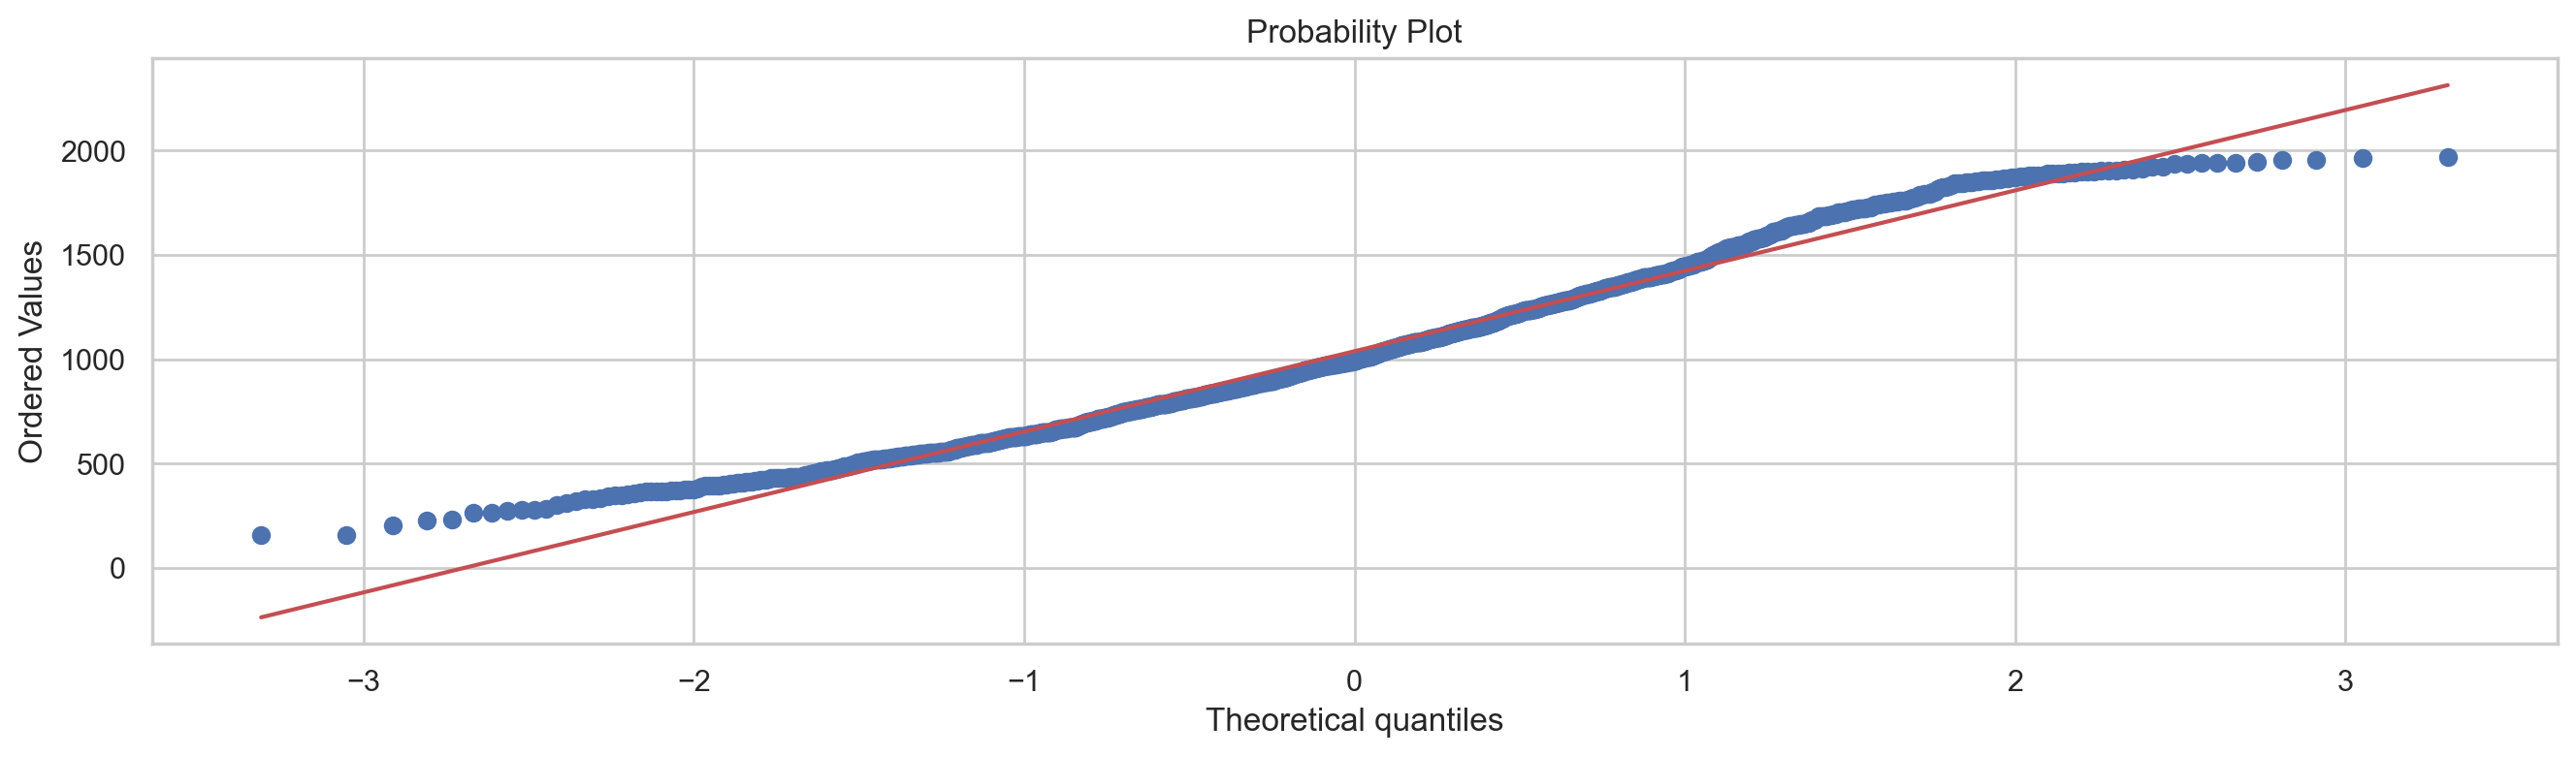

In [277]:
# QQ-plot to determine if the data is close to normal
fig = plt.figure(figsize = (16, 4))
res = stats.probplot(df_reg['Money'], plot=plt)
plt.show()

The QQ plot displays how the data points deviate from the normal distribution, which can be used to determine if the data follows a normal distribution or not.
<br>The plot shows that Money is normally distributed

#### Scaling the independent variables

In [279]:
# Transforming features to meet scaling assumption
feats=['Money', 'tee_shots', 'mid_range', 'short_range', 'putting']
sc=StandardScaler()
df_reg[feats]=sc.fit_transform(df_reg[feats])

# Normalize inputs
for feat in feats:
    df_reg[feat] = df_reg[feat] / df_reg[feat].std()

df_reg.describe()

,Money,tee_shots,mid_range,short_range,putting
count,1.487000e+03,1.487000e+03,1.487000e+03,1.487000e+03,1.487000e+03
mean,-1.941210e-16,-2.389182e-18,2.060670e-17,1.434442e-17,1.515637e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.268372e+00,-2.739618e+00,-2.742014e+00,-2.808174e+00,-2.735593e+00
25%,-7.320723e-01,-6.823166e-01,-6.975136e-01,-6.926791e-01,-6.728585e-01
50%,-1.119060e-01,2.038174e-02,3.124889e-02,-2.959445e-02,1.774296e-02
75%,6.689228e-01,6.885400e-01,6.840860e-01,6.711120e-01,6.782698e-01
max,2.399345e+00,2.863393e+00,3.016409e+00,2.923000e+00,2.755624e+00


The variables are scaled

In [280]:
# Assigning variables
X = df_reg.copy() # Set X
X.drop(['Money'], axis=1, inplace=True) # Dropping target
Y = df_reg['Money'] # Set Y

In [281]:
# Split data into training and testing sets (66%-33%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state=1)

#### Linear Regression

In [282]:
# Initialize and run the linear regression
LR = LinearRegression()
LR.fit(X_train, Y_train)

# Predictions
LR_train_pred = LR.predict(X_train)
LR_test_pred = LR.predict(X_test)

#### Random Forest

In [283]:
# Initialize and run the random forest
RF = RandomForestRegressor(n_estimators = 500)
RFR = RF.fit(X_train, Y_train)

# Predictions
RFRtrainpred = RFR.predict(X_train)
RFRtestpred = RFR.predict(X_test)

### Performance Metrics

`Mean Squared Error (MSE):` measures the average of the squares of the errors, which is more useful than MAE as it “punishes” larger errors.<br>
`R-Squared (R^2):` also known as the coefficient of determination, this measures the proportion of variance in the response variable that is explained by the model.

In [284]:
# Calculating MSE for LR
LR_mse_train = mean_squared_error(Y_train, LR_train_pred)
LR_mse_test = mean_squared_error(Y_test, LR_test_pred)

# Calculating R2 for LR
LR_r2_train = r2_score(Y_train, LR_train_pred)
LR_r2_test = r2_score(Y_test, LR_test_pred)

In [285]:
#Calculating MSE for RFR
RFR_mse_train = mean_squared_error(Y_train, RFRtrainpred)
RFR_mse_test = mean_squared_error(Y_test, RFRtestpred)

#Calculating R2 for RFR
RFR_r2_train = r2_score(Y_train, RFRtrainpred)
RFR_r2_test = r2_score(Y_test, RFRtestpred)

In [286]:
#Printing Results
print('\nLinear Regression Model: ')
print('MSE (Train):',LR_mse_train)
print('MSE (Test):',LR_mse_test)
print('R^2 (Train):',LR_r2_train)
print('R^2 (Test):',LR_r2_test)

print('\nRandom Forest Regression Model: ')
print('MSE (Train):',RFR_mse_train)
print('MSE (Test):',RFR_mse_test)
print('R^2 (Train):',RFR_r2_train)
print('R^2 (Test):',RFR_r2_test)


Linear Regression Model: 
MSE (Train): 0.4171684562178561
MSE (Test): 0.41937772006924745
R^2 (Train): 0.5930714189987984
R^2 (Test): 0.5556336880680806

Random Forest Regression Model: 
MSE (Train): 0.06479309032684613
MSE (Test): 0.47407330723952146
R^2 (Train): 0.9367973299217592
R^2 (Test): 0.497679068195112


The results from the testing set of the two regression models show that the linear regression regression model performs better than the random forest model. The MSE of the linear regression model is significantly lower than the random forest model (0.419 vs 0.474) and the R^2 is also higher (0.556 vs 0.498). This indicates that the linear regression model is better at predicting the target variable and a better fit for this problem.

### Feature Importance

In [287]:
# Using SelectKBest f_regression score function to select the best LR features
bestfeatures = SelectKBest(score_func=f_regression, k=4)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print("Linear Regression:")
print(featureScores.nlargest(4,'Score'))  #print 4 best features
print()
# Ranking RFR feature importance
importance = RFR.feature_importances_
indices = np.argsort(importance)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names

# Print the feature ranking
print("Random Forest Regressor:")
print("Feature     Score")
for f in range(X_train.shape[1]):
    print("%d. %s %f" % (f + 1, names[f], importance[indices[f]]))

Linear Regression:
      Features       Score
1    mid_range  480.251701
0    tee_shots  350.961735
3      putting  100.392585
2  short_range   76.584530

Random Forest Regressor:
Feature     Score
1. mid_range 0.371597
2. tee_shots 0.238583
3. putting 0.235705
4. short_range 0.154114


From the results, it appears that mid_range is the most important feature for both models, followed by tee_shots, putting, and short_game. In the Random Forest Regressor, the importance of the other features aside from mid_range is much more evenly distributed. This suggests that all four features are important in predicting the outcome of a golf game, but mid_game is the most important.

## 6. <a id='section_6'>Conclusion</a>
<a href='#TOC'>Back to table of Contents</a>

Overall, I am very happy with the results of this project. Although the models were not as precise as I would have hoped, I was able to uncover some interesting insights. I also learned a lot about the dataset, including the influence of distance off-the-tee compared to accuracy, all strokes gained metrics (especially approach), and the lack of influence green in regulation, fairway percentage, and scrambling showed in determining the sucess of a golfer.<br>

As the data used in this project contains only a subset of all the available PGA Tour data, further research could be conducted to better understand the intricacies of the game and help inform better decision making. In the future, it would be fascinating to acquire a dataset with additional data to explore. The golf course, tournament, type of grass, weather conditions, bunker shots, age, season, etc., would all be interesting metrics to investigate in a future project. Additionally, advanced golf swing metrics would be compelling to look into by comparing groups of players with similar swings.<br>